In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing python built in libraries

import numpy as np
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To scale our data
from sklearn.preprocessing import scale

# To perform K-means clustering
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Reading the dataset

In [3]:
country_cluster = pd.read_csv("C:/PGDDS/Machine_learning/unsupervised_learning/clustering_pca_assignment/Country-data.csv")
country_cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Inspecting data

In [4]:
country_cluster.shape

(167, 10)

In [5]:
country_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [6]:
country_cluster.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


We can clearly see that there are <span style="color:red">__Outliers present__</span> in the data

#### Handling Data Quality Issues

In [7]:
# Checking Null values
100*(country_cluster.isnull().sum()/len(country_cluster.index))

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

There are <span style="color:blue">__No Null values__</span> in the given dataframe.

In [8]:
# Original Dataframe
country_cluster.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Dropping 'country' column for Scaling
__'country'__ column is __not required for scaling__, so removing country column and storing it into separate dataframe

In [9]:
country_col = country_cluster['country'].reset_index(drop=True)
country_cluster_unscale = country_cluster.drop(['country'],axis=1)

#### Scaling the data

In [10]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_cluster_scaled = standard_scaler.fit_transform(country_cluster_unscale)

colnames = list(country_cluster_unscale.columns)
country_cluster_scaled = pd.DataFrame(country_cluster_scaled, columns=colnames)
print(country_cluster_scaled.shape)
country_cluster_scaled.head()

(167, 9)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [11]:
# Adding back the country column to Scaled dataset
country_scaled_df = country_cluster_scaled.join(country_col)
print(country_scaled_df.shape)
country_scaled_df.head(5)  # This dataframe will be required for outlier treatment post PCA

(167, 10)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Afghanistan
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Albania
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Algeria
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Angola
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Antigua and Barbuda


# PCA

In [12]:
# Scaled Dataframe to be used for PCA
country_cluster_scaled.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### PCA on entire dataset
Finding required number of Principal Component

In [13]:
# Importing the PCA module
from sklearn.decomposition import PCA
pca1 = PCA(svd_solver='randomized', random_state=42)

# Doing PCA on the scaled dataframe
pca1.fit(country_cluster_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [14]:
# Checking the variance explained by each Principal Component
pca1.explained_variance_ratio_

array([ 0.4595174 ,  0.17181626,  0.13004259,  0.11053162,  0.07340211,
        0.02484235,  0.0126043 ,  0.00981282,  0.00743056])

In [15]:
# Checking the cumulative variance explained by Principal Component
import numpy as np
variance_ratio_cum_sum=np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)
print(variance_ratio_cum_sum)

[ 45.95  63.13  76.13  87.18  94.52  97.    98.26  99.24  99.98]


### Scree plot 
Scree plot i.e cumulative variance against the number of components to identify optimal number of components

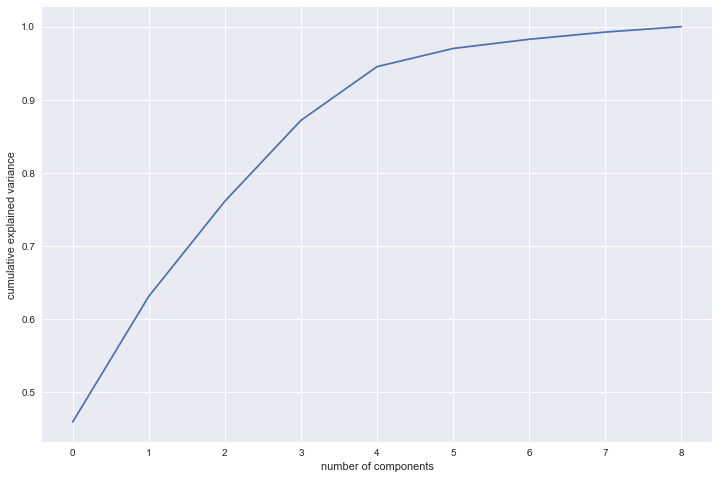

In [16]:
# Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

From the above scree plot we can see that for
- __number of components = 5__, the __maximum variance explained is 94.52__.
- So <span style='color:blue'>__the optimal number of components are 5__</span>

### PCA with <span style="color:blue">__no. of components = 5__</span>

In [17]:
# Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(n_components=5,svd_solver='randomized', random_state=42)

In [18]:
# Doing PCA on the scaled data
pca.fit(country_cluster_scaled)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [19]:
# Assessing the Principal Component
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662]])

In [20]:
# Applying transform 
pca_transform = pca.transform(country_cluster_scaled)
pca_transform

array([[ -2.91302459e+00,   9.56205755e-02,  -7.18118495e-01,
          1.00525464e+00,  -1.58310044e-01],
       [  4.29911330e-01,  -5.88155666e-01,  -3.33485505e-01,
         -1.16105859e+00,   1.74677321e-01],
       [ -2.85225077e-01,  -4.55174413e-01,   1.22150481e+00,
         -8.68114503e-01,   1.56474647e-01],
       [ -2.93242265e+00,   1.69555507e+00,   1.52504374e+00,
          8.39625014e-01,  -2.73208934e-01],
       [  1.03357587e+00,   1.36658709e-01,  -2.25720917e-01,
         -8.47062687e-01,  -1.93006961e-01],
       [  2.24072616e-02,  -1.77918658e+00,   8.69997116e-01,
         -3.69668667e-02,   9.81056507e-01],
       [ -1.01583737e-01,  -5.68251724e-01,   2.42091816e-01,
         -1.46626576e+00,  -5.59924282e-02],
       [  2.34216461e+00,  -1.98845915e+00,   1.90344188e-01,
          1.10503778e+00,  -7.31192330e-01],
       [  2.97376366e+00,  -7.34688659e-01,  -5.19766356e-01,
          1.20544210e+00,   8.35797058e-02],
       [ -1.81486997e-01,  -4.0286587

In [21]:
# Checking the variance explained by each Principal Component
pca.explained_variance_ratio_

array([ 0.4595174 ,  0.17181626,  0.13004259,  0.11053162,  0.07340211])

In [22]:
# Checking the cumulative variance explained by Principal Component
variance_ratio_cum_sum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(variance_ratio_cum_sum)

[ 45.95  63.13  76.13  87.18  94.52]


#### Checking correlation between Prinicpal Components

In [23]:
# creating correlation matrix between principal components
corrmat = np.corrcoef(pca_transform.transpose())

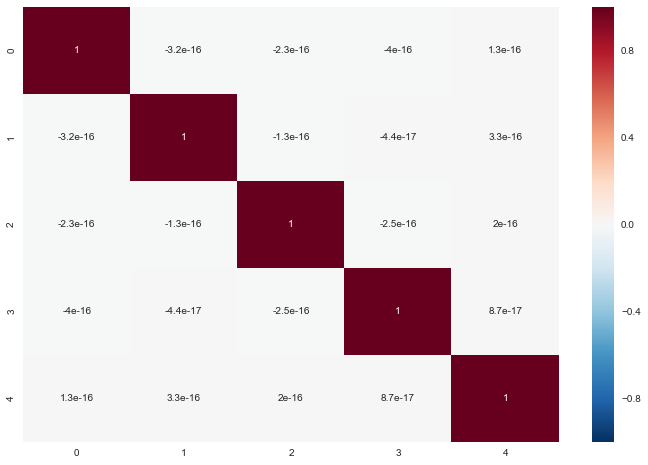

In [24]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (12,8))
sns.heatmap(corrmat,annot = True)
plt.show()

We can see from the plot that there is <span style='color:green'>__no correlation exist between Principal Component after PCA__</span>

#### Checking correlation between Principal Components and Original variables

In [25]:
# This step is performed to check how each original variable is associated with each Principal Component

# Creating dataframe for Principal Components and Original variables
pc_original_cor = pd.DataFrame(pca.components_,columns=country_cluster_scaled.columns,index = ['PC1','PC2','PC3','PC4','PC5'])
pc_original_cor

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
PC1,-0.419519,0.283897,0.150838,0.161482,0.398441,-0.193173,0.425839,-0.403729,0.392645
PC2,0.192884,0.613163,-0.243087,0.671821,0.022536,-0.008404,-0.222707,0.155233,-0.046022
PC3,-0.029544,0.144761,-0.596632,-0.299927,0.301548,0.642520,0.113919,0.019549,0.122977
PC4,0.370653,0.003091,0.461897,-0.071907,0.392159,0.150442,-0.203797,0.378304,0.531995
PC5,-0.168970,0.057616,0.518000,0.255376,-0.247150,0.714869,0.108220,-0.135262,-0.180167


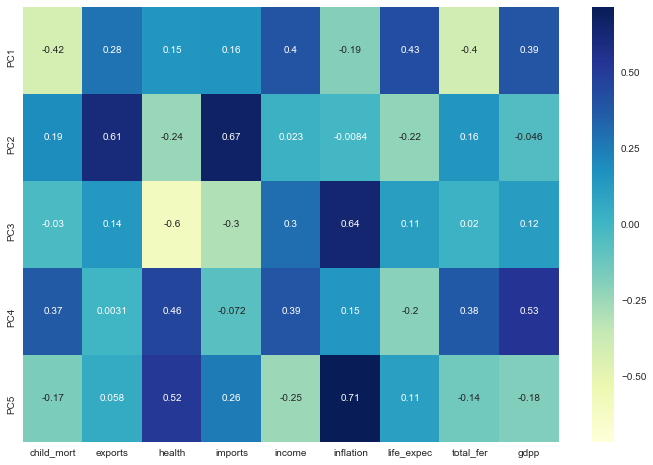

In [26]:
#plotting the correlation matrix between Principal Components and Original variables
%matplotlib inline
plt.figure(figsize = (12,8))
sns.heatmap(pc_original_cor, cmap='YlGnBu', annot=True)

In [27]:
# Transposing the dataframe for scatterplot between two principal components
pc_original_cor1 = pc_original_cor.T
pc_original_cor1

,PC1,PC2,PC3,PC4,PC5
child_mort,-0.419519,0.192884,-0.029544,0.370653,-0.168970
exports,0.283897,0.613163,0.144761,0.003091,0.057616
health,0.150838,-0.243087,-0.596632,0.461897,0.518000
imports,0.161482,0.671821,-0.299927,-0.071907,0.255376
income,0.398441,0.022536,0.301548,0.392159,-0.247150
inflation,-0.193173,-0.008404,0.642520,0.150442,0.714869
life_expec,0.425839,-0.222707,0.113919,-0.203797,0.108220
total_fer,-0.403729,0.155233,0.019549,0.378304,-0.135262
gdpp,0.392645,-0.046022,0.122977,0.531995,-0.180167


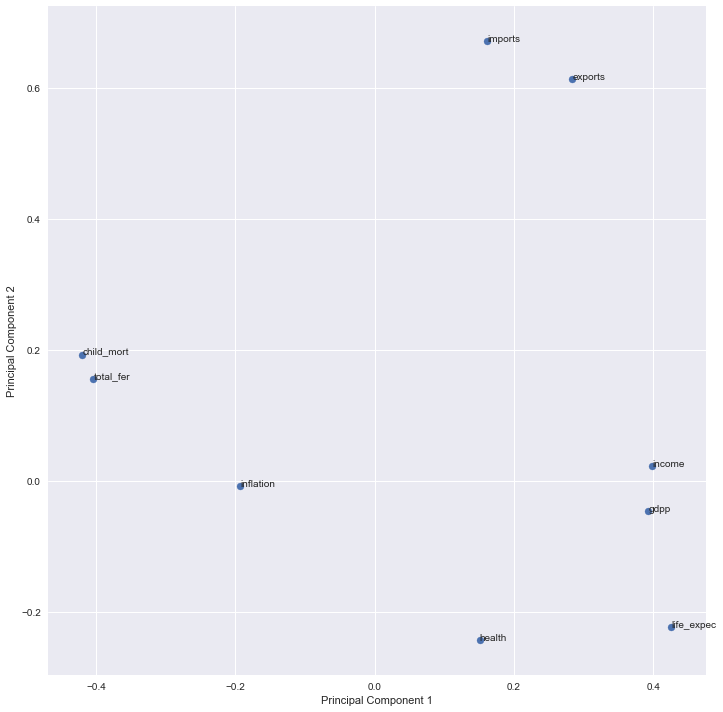

In [28]:
%matplotlib inline
fig = plt.figure(figsize = (10,10))
plt.scatter(pc_original_cor1.PC1, pc_original_cor1.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pc_original_cor1.index):
    plt.annotate(txt, (pc_original_cor1.PC1[i],pc_original_cor1.PC2[i]))
plt.tight_layout()
plt.show()

In [ ]:
# Creating dataframe for Principal Components containing all rows
pca_transform_df = pd.DataFrame(pca_transform, columns = {'PC1':pca.components_[0], 'PC2':pca.components_[1],
                                                          'PC3':pca.components_[2], 'PC4':pca.components_[3], 
                                                          'PC5':pca.components_[4]})
pca_transform_df.head()

#### Incremental PCA

__Since the number of variables are less so we do not need to perform Incremental PCA__

### Add non PCA column
Adding __non PCA column i.e 'country' to PCA dataset.__

In [30]:
pca_transform_df = pca_transform_df.join(country_col)
pca_transform_df.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,Antigua and Barbuda


### Outlier treatment after PCA

In [31]:
# Dataframe to be used for Outlier removal post PCA -- 

# Inspecting
pca_transform_df.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,Antigua and Barbuda


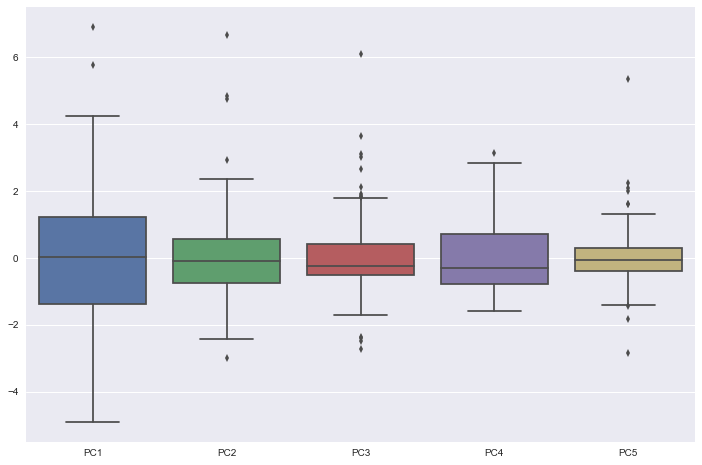

In [32]:
# Boxplot for all component to identify outliers
plt.figure(figsize=(12,8))
sns.boxplot(pca_transform_df)
plt.show()

__Boxplot works on Inter Quartile Range (IQR)__
- The <span style="color:blue">__method chosen for outlier removal is IQR__</span>
- Will be removing outliers from variables (principal components) one by one

#### Outlier removal from PC 1

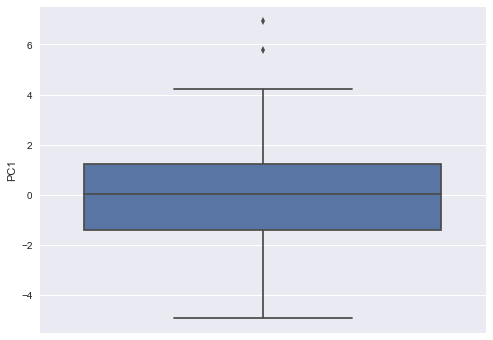

In [33]:
# Boxplot for Principal Component 1 (PC1)
plt.figure(figsize=(8,6))
sns.boxplot(x = pca_transform_df.PC1, orient='v')
plt.show()

In [34]:
# Outlier treatment from PC1 using IQR method
Q1 = pca_transform_df.PC1.quantile(0.25)
Q3 = pca_transform_df.PC1.quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5*IQR
high = Q3 + 1.5*IQR
outlier_PC1 = pca_transform_df[(pca_transform_df.PC1 >= low) & (pca_transform_df.PC1 <= high)]

In [35]:
# Inspecting how many rows left after outlier removal from PC1
print('No. of rows after outlier removal from PC1: ', len(outlier_PC1))
print('No. of rows before outlier: ', len(pca_transform_df))

No. of rows after outlier removal from PC1:  165
No. of rows before outlier:  167


#### Outlier removal from PC 2

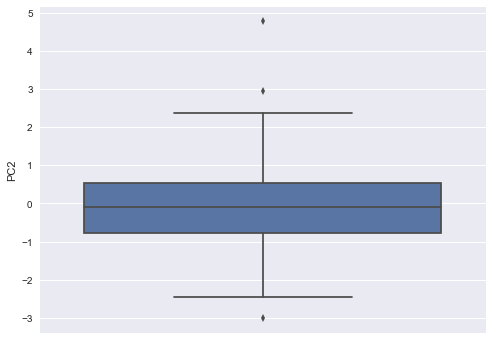

In [36]:
# Boxplot for Principal Component 2 (PC2)
plt.figure(figsize=(8,6))
sns.boxplot(x = outlier_PC1.PC2, orient='v')
plt.show()

In [37]:
# Outlier treatment from PC2 using IQR method
Q1 = outlier_PC1.PC2.quantile(0.25)
Q3 = outlier_PC1.PC2.quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5*IQR
high = Q3 + 1.5*IQR
outlier_PC2 = outlier_PC1[(outlier_PC1.PC2 >= low) & (outlier_PC1.PC2 <= high)]

In [38]:
# Inspecting how many rows left after outlier removal from PC2
print('No. of rows after outlier removal from PC2: ', len(outlier_PC2))
print('No. of rows before outlier: ', len(outlier_PC1))

No. of rows after outlier removal from PC2:  162
No. of rows before outlier:  165


#### Outlier removal from PC 3

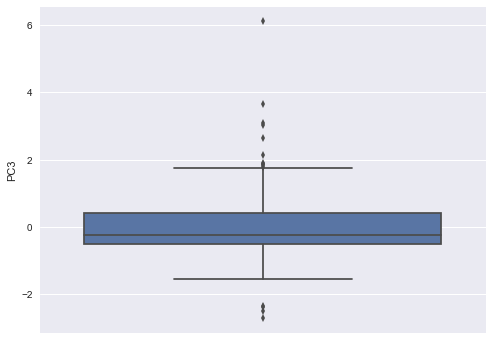

In [39]:
# Boxplot for Principal Component 3 (PC3)
plt.figure(figsize=(8,6))
sns.boxplot(x = outlier_PC2.PC3, orient='v')
plt.show()

In [40]:
# Outlier treatment from PC3 using IQR method
Q1 = outlier_PC2.PC3.quantile(0.25)
Q3 = outlier_PC2.PC3.quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5*IQR
high = Q3 + 1.5*IQR
outlier_PC3 = outlier_PC2[(outlier_PC2.PC3 >= low) & (outlier_PC2.PC3 <= high)]

In [41]:
# Inspecting how many rows left after outlier removal from PC3
print('No. of rows after outlier removal from PC3: ', len(outlier_PC3))
print('No. of rows before outlier: ', len(outlier_PC2))

No. of rows after outlier removal from PC3:  148
No. of rows before outlier:  162


#### Outlier removal from PC 4

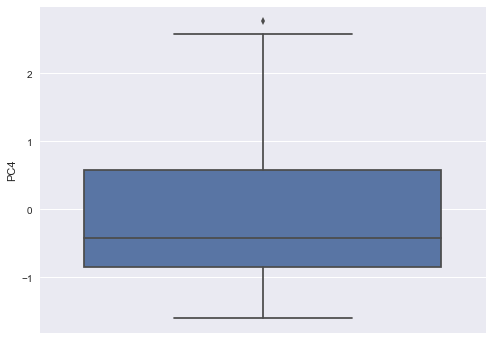

In [42]:
# Boxplot for Principal Component 4 (PC4)
plt.figure(figsize=(8,6))
sns.boxplot(x = outlier_PC3.PC4, orient='v')
plt.show()

In [43]:
# Outlier treatment from PC4 using IQR method
Q1 = outlier_PC3.PC4.quantile(0.25)
Q3 = outlier_PC3.PC4.quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5*IQR
high = Q3 + 1.5*IQR
outlier_PC4 = outlier_PC3[(outlier_PC3.PC4 >= low) & (outlier_PC3.PC4 <= high)]

In [44]:
# Inspecting how many rows left after outlier removal from PC4
print('No. of rows after outlier removal from PC4: ', len(outlier_PC4))
print('No. of rows before outlier: ', len(outlier_PC3))

No. of rows after outlier removal from PC4:  147
No. of rows before outlier:  148


#### Outlier removal from PC 5

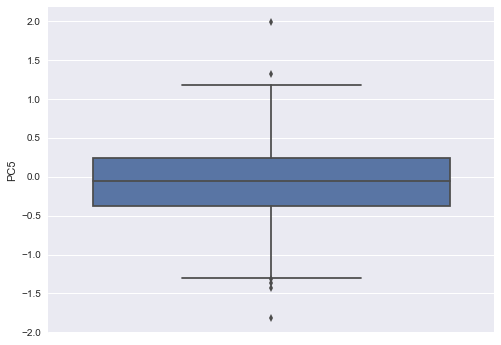

In [45]:
# Boxplot for Principal Component 5 (PC5)
plt.figure(figsize=(8,6))
sns.boxplot(x = outlier_PC4.PC5, orient='v')
plt.show()

In [46]:
# Outlier treatment from PC5 using IQR method
Q1 = outlier_PC4.PC5.quantile(0.25)
Q3 = outlier_PC4.PC5.quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5*IQR
high = Q3 + 1.5*IQR
outlier_PC5 = outlier_PC4[(outlier_PC4.PC5 >= low) & (outlier_PC4.PC5 <= high)]

In [47]:
# Inspecting how many rows left after outlier removal from PC5
print('No. of rows after outlier removal from PC5: ', len(outlier_PC5))
print('No. of rows before outlier: ', len(outlier_PC4))

No. of rows after outlier removal from PC5:  141
No. of rows before outlier:  147


In [48]:
# Dataframe after all outlier removed from PC(Principal Components)
outlier_PC5.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,Antigua and Barbuda


##### Dataframe containing Outlier data

In [49]:
# Dataframe containing Outlier data
outlier_df = pca_transform_df[~pca_transform_df.index.isin(outlier_PC5.index)]
print('No. of outliers: ', len(outlier_df))
outlier_df.head() # This dataframe will be used after clustering is performed

No. of outliers:  26


,PC1,PC2,PC3,PC4,PC5,country
17,-2.672314,0.418172,-0.257368,0.278672,-1.431768,Benin
23,2.460086,0.016454,3.019840,0.776841,-1.031809,Brunei
28,-2.807909,0.078649,-0.342961,0.543557,-1.314868,Cameroon
31,-3.964964,0.386619,-0.323557,0.918301,-1.822389,Central African Republic
49,-1.293423,2.363695,1.779334,1.737244,0.060761,Equatorial Guinea


##### Making two dataframe
Since we have to perform two types of clustering K-means and Hierarchical, we are making two separate dataframe to work on
- Kmeans_postpca_outrem_country - Will be used for K-means Clustering
- hierar_postpca_outrem_country - Will be used for Hierarchical Clustering

__Both these dataframes are formed from the dataframe which is scaled, PCA performed and outlier removed__

In [50]:
# For K-Means Clustering 
Kmeans_postpca_outrem_country = outlier_PC5

In [51]:
# For hierarchical clustering
hierar_postpca_outrem_country = outlier_PC5

#### Final dataframe after PCA and outlier treatment

In [52]:
# Final dataframe after PCA and outlier treatment
postpca_outrem_country = outlier_PC5
postpca_outrem_country.head(5)

,PC1,PC2,PC3,PC4,PC5,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,Antigua and Barbuda


### Scatter Plots for Principal Components
Since first three Principal Components i.e PC1, PC2, PC3 explain variance upto 76.13 , so visualising these PC's against each other.

In [53]:
# Since the dataframe contain distorted index so for scatter plot resetting index
afterpca_outrem = postpca_outrem_country.reset_index(drop=True)
afterpca_outrem.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,Antigua and Barbuda


##### Scatter plot for PC1 and PC2

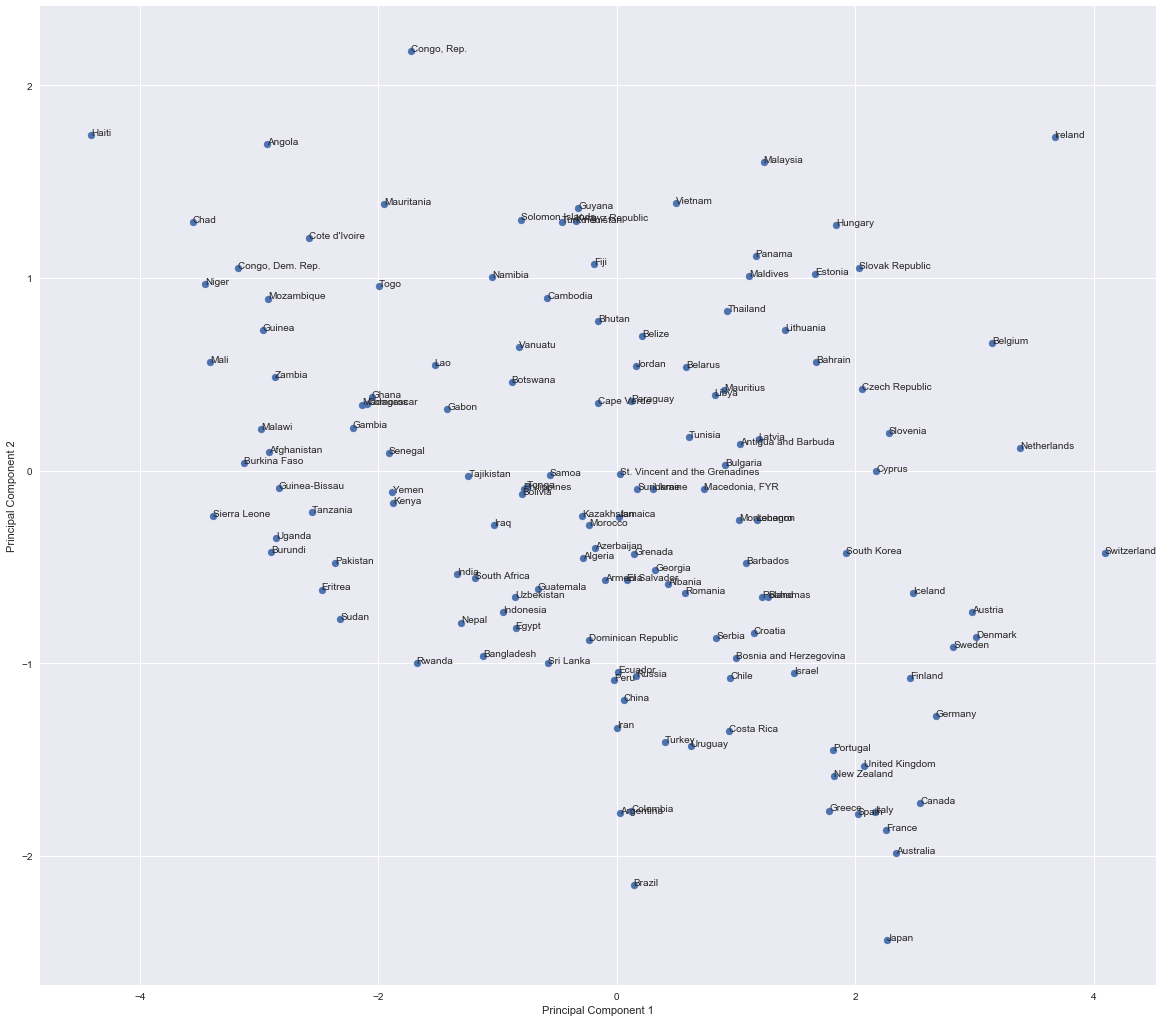

In [54]:
%matplotlib inline
fig = plt.figure(figsize = (20,18))
plt.scatter(afterpca_outrem.PC1, afterpca_outrem.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(afterpca_outrem.country):
    plt.annotate(txt, (afterpca_outrem.PC1[i],afterpca_outrem.PC2[i]))
plt.show()

##### Scatter plot for PC1 and PC3

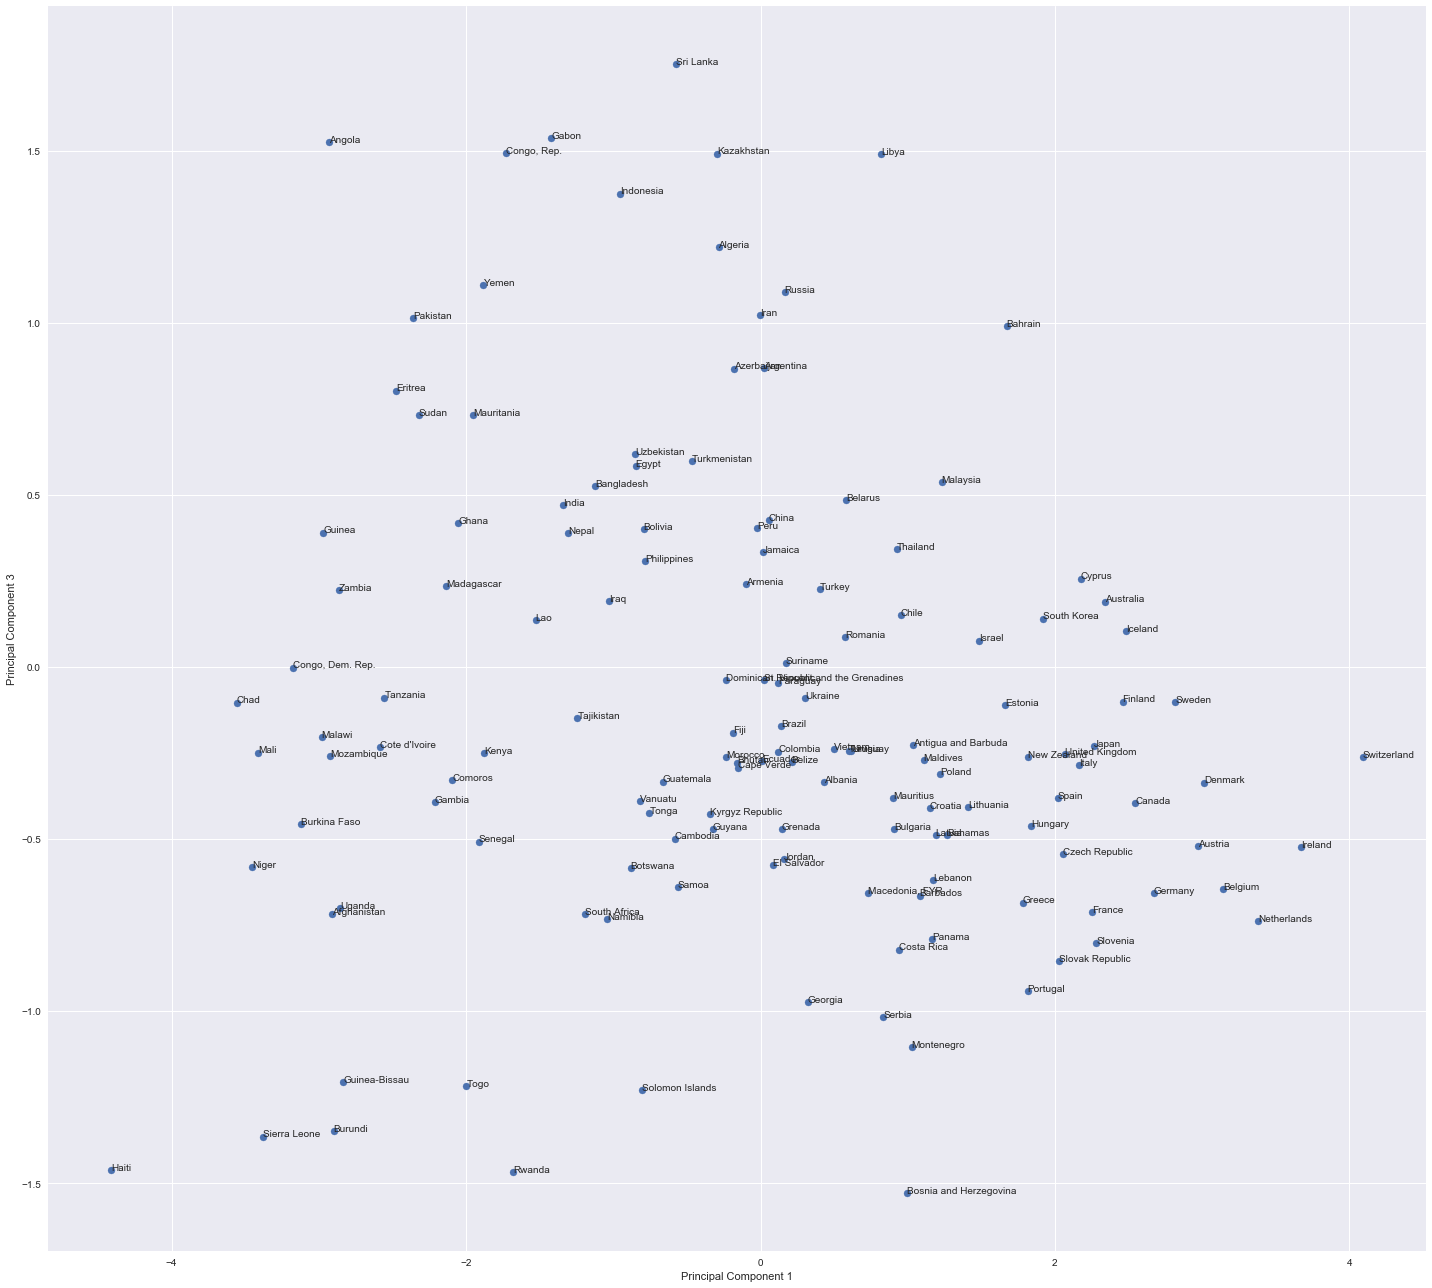

In [55]:
%matplotlib inline
fig = plt.figure(figsize = (20,18))
plt.scatter(afterpca_outrem.PC1, afterpca_outrem.PC3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
for i, txt in enumerate(afterpca_outrem.country):
    plt.annotate(txt, (afterpca_outrem.PC1[i],afterpca_outrem.PC3[i]))
plt.tight_layout()
plt.show()

##### Scatter plot for PC2 and PC3

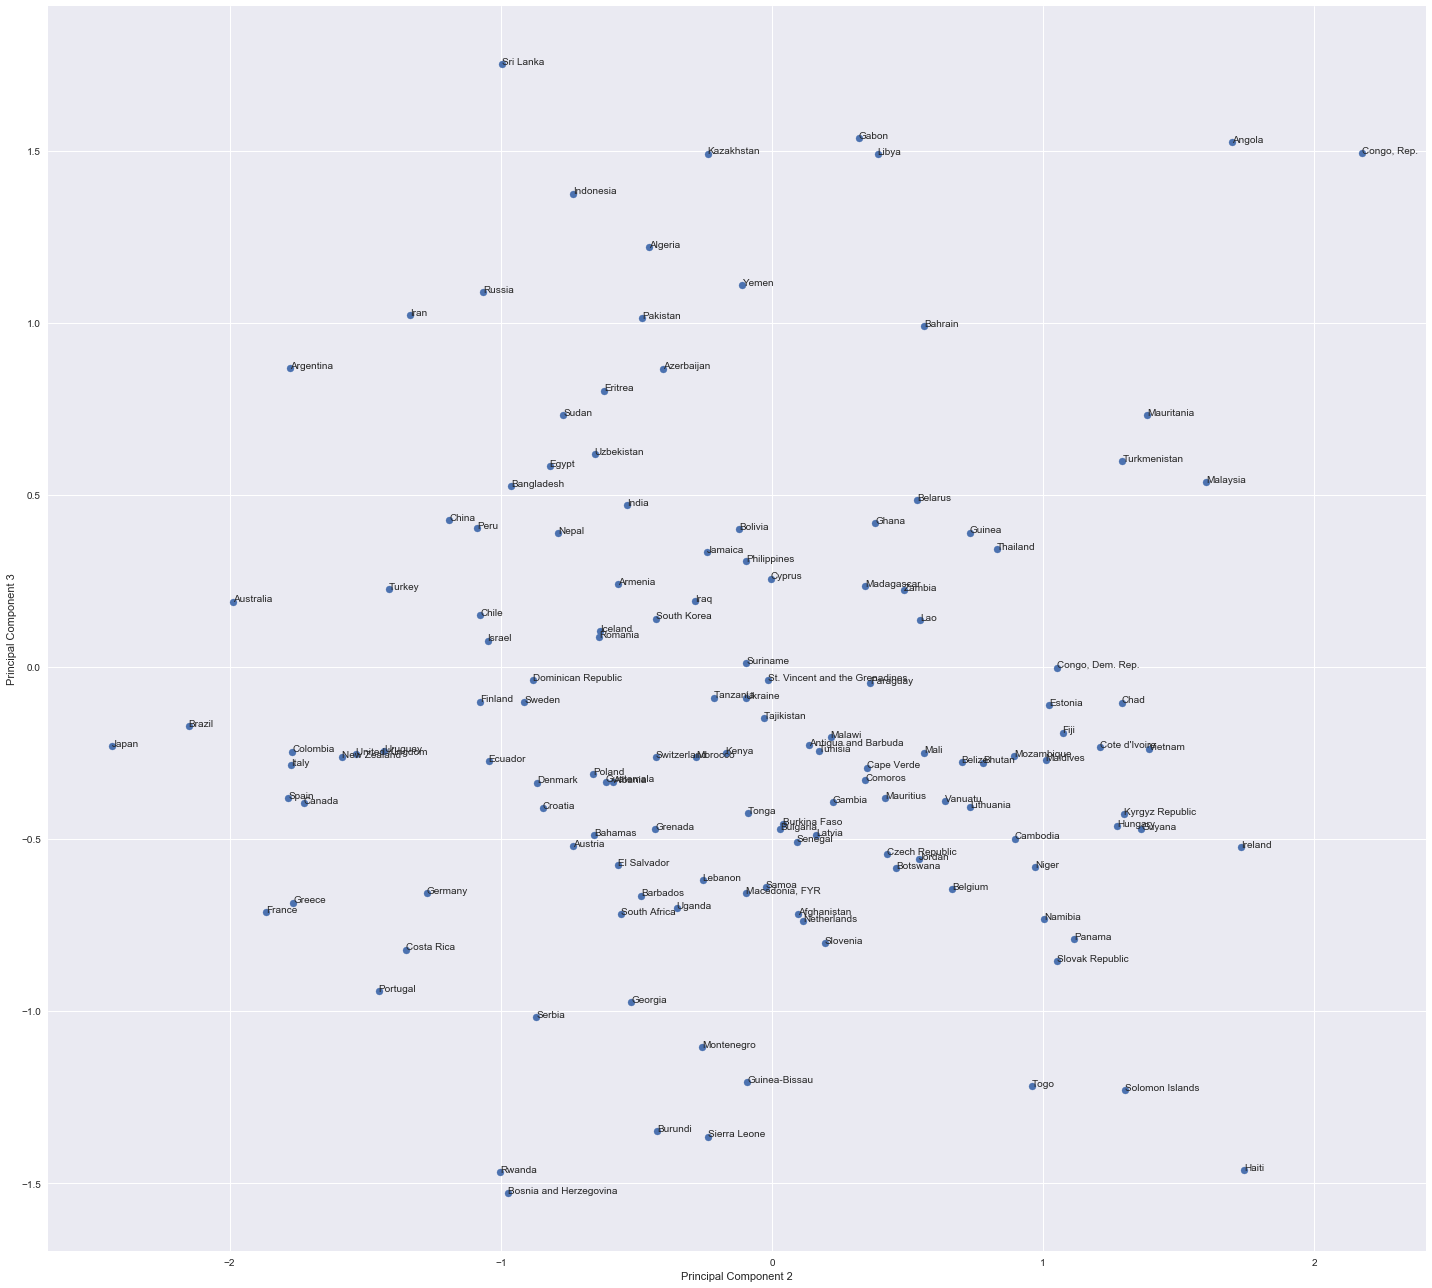

In [56]:
%matplotlib inline
fig = plt.figure(figsize = (20,18))
plt.scatter(afterpca_outrem.PC2, afterpca_outrem.PC3)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
for i, txt in enumerate(afterpca_outrem.country):
    plt.annotate(txt, (afterpca_outrem.PC2[i],afterpca_outrem.PC3[i]))
plt.tight_layout()
plt.show()

# K-means Clustering

In [57]:
# Inspecting dataframe created after PCA, outlier removal specially for k-means clustering mentioned earlier
Kmeans_postpca_outrem_country.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,Antigua and Barbuda


In [58]:
# Removing country column for k-means clustering
km_col = Kmeans_postpca_outrem_country['country']
Kmeans_postpca_outrem_country.drop(['country'],axis=1, inplace=True)
Kmeans_postpca_outrem_country.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007


## Statistics

### Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [59]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [60]:
hopkins(Kmeans_postpca_outrem_country)

0.72199398665527825

- __Hopkins statistics is more than 0.7 so__ <span style="color:blue">__the data has high tendency to cluster__</span>
- __K-means can be performed__

## Analysis to determine optimal clusters

### Silhouette Analysis
* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [61]:
# Calculating Silhouette Score
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,random_state=42).fit(Kmeans_postpca_outrem_country)
    sse_.append([k, silhouette_score(Kmeans_postpca_outrem_country, kmeans.labels_)])

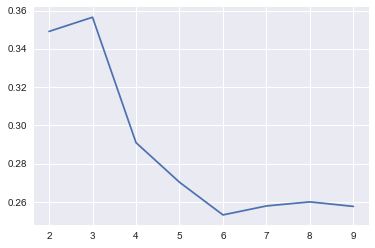

In [62]:
# Plotting Silhouette Measure
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

From above plot we can see that __for k=3, silhouette score is closer towards 1__, so we can say the __optimal number of cluster (k) will be 3__

### Elbow analysis

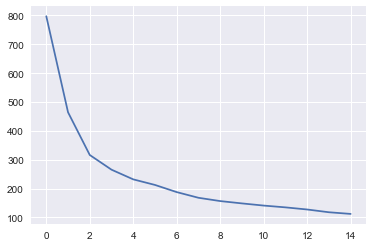

In [63]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,16)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50, random_state=42)
    model_clus.fit(Kmeans_postpca_outrem_country)
    ssd.append(model_clus.inertia_)

# Plotting Elbow curve
plt.plot(ssd)

From the above analysis, we can say that __optimal no of cluster(k) = 3__

### K-Means clustering execution
From Silhouette score and Elbow curve we can see that __optimal number of cluster(k) = 3__

In [64]:
# Since we have to perform clustering for different k like k=3, k=4, 
# Making copy of PCA outlier remove dataframe for different k

# For k=3
Kmeans_cluster_3 = Kmeans_postpca_outrem_country

# For k=4
Kmeans_cluster_4 = Kmeans_postpca_outrem_country

# For k=5
Kmeans_cluster_5 = Kmeans_postpca_outrem_country

### K-means for <span style="color:blue">__no of cluster, K = 3__</span>

In [65]:
# Kmeans with K=3
k_means= KMeans(n_clusters = 3, max_iter=50, random_state=42)
k_means.fit(Kmeans_cluster_3)
print(k_means.cluster_centers_)
print("\n")
print('Number of iterations: ',k_means.n_iter_)

[[-2.41022482  0.36564329 -0.12180956  0.595214   -0.30058012]
 [ 0.19389803 -0.15311396 -0.02389361 -0.80689786  0.10191113]
 [ 2.40634476 -0.80739912 -0.36833575  0.70393759 -0.07673426]]


Number of iterations:  8


#### Joining clustered data with original variables

In [66]:
# Storing identified clusters into dataframe
k_means_labels = pd.DataFrame(k_means.labels_, columns = ['ClusterId'])

# Retaining index
k_means_labels.index = Kmeans_cluster_3.index

# Concatenating assigned Clusters with original dataframe
Kmeans_cluster_3 = pd.concat([Kmeans_cluster_3,k_means_labels], axis=1)
Kmeans_cluster_3.head(20)

,PC1,PC2,PC3,PC4,PC5,ClusterId
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,1
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,1
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,0
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,1
5,0.022407,-1.779187,0.869997,-0.036967,0.981057,1
6,-0.101584,-0.568252,0.242092,-1.466266,-0.055992,1
7,2.342165,-1.988459,0.190344,1.105038,-0.731192,2
8,2.973764,-0.734689,-0.519766,1.205442,0.083580,2
9,-0.181487,-0.402866,0.867459,-0.438773,0.137350,1


#### Adding all orginal variables to clustered dataframe

In [67]:
km_pca_all = Kmeans_cluster_3.join(country_scaled_df)
km_pca_all.head(20)

,PC1,PC2,PC3,PC4,PC5,ClusterId,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,1,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,0,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,1,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Antigua and Barbuda
5,0.022407,-1.779187,0.869997,-0.036967,0.981057,1,-0.591177,-0.812628,0.468966,-1.279787,0.080920,1.244725,0.591474,-0.382933,-0.145791,Argentina
6,-0.101584,-0.568252,0.242092,-1.466266,-0.055992,1,-0.501643,-0.743107,-0.882089,-0.065883,-0.543421,-0.001123,0.309514,-0.833471,-0.533233,Armenia
7,2.342165,-1.988459,0.190344,1.105038,-0.731192,2,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699,Australia
8,2.973764,-0.734689,-0.519766,1.205442,0.083580,2,-0.844858,0.372890,1.527901,0.037693,1.355617,-0.655549,1.121559,-0.999109,1.857082,Austria
9,-0.181487,-0.402866,0.867459,-0.438773,0.137350,1,0.023128,0.482661,-0.341667,-1.085065,-0.059556,0.571037,-0.164178,-0.681083,-0.389857,Azerbaijan


In [68]:
# Number of countries falling in each clusters
cluster_wise_count = km_pca_all.groupby('ClusterId')['country'].count().reset_index()
cluster_wise_count

,ClusterId,country
0,0,38
1,1,76
2,2,27


### Scatter Plots of some Principal Components with assigned Clusters
Visualising PC1, PC2, PC3 with assigned clusters

In [69]:
# Since the dataframe contain distorted index so for scatter plot resetting index
km_pca_country = km_pca_all.reset_index(drop=True)
km_pca_country.head(5)

,PC1,PC2,PC3,PC4,PC5,ClusterId,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,1,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,0,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,1,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Antigua and Barbuda


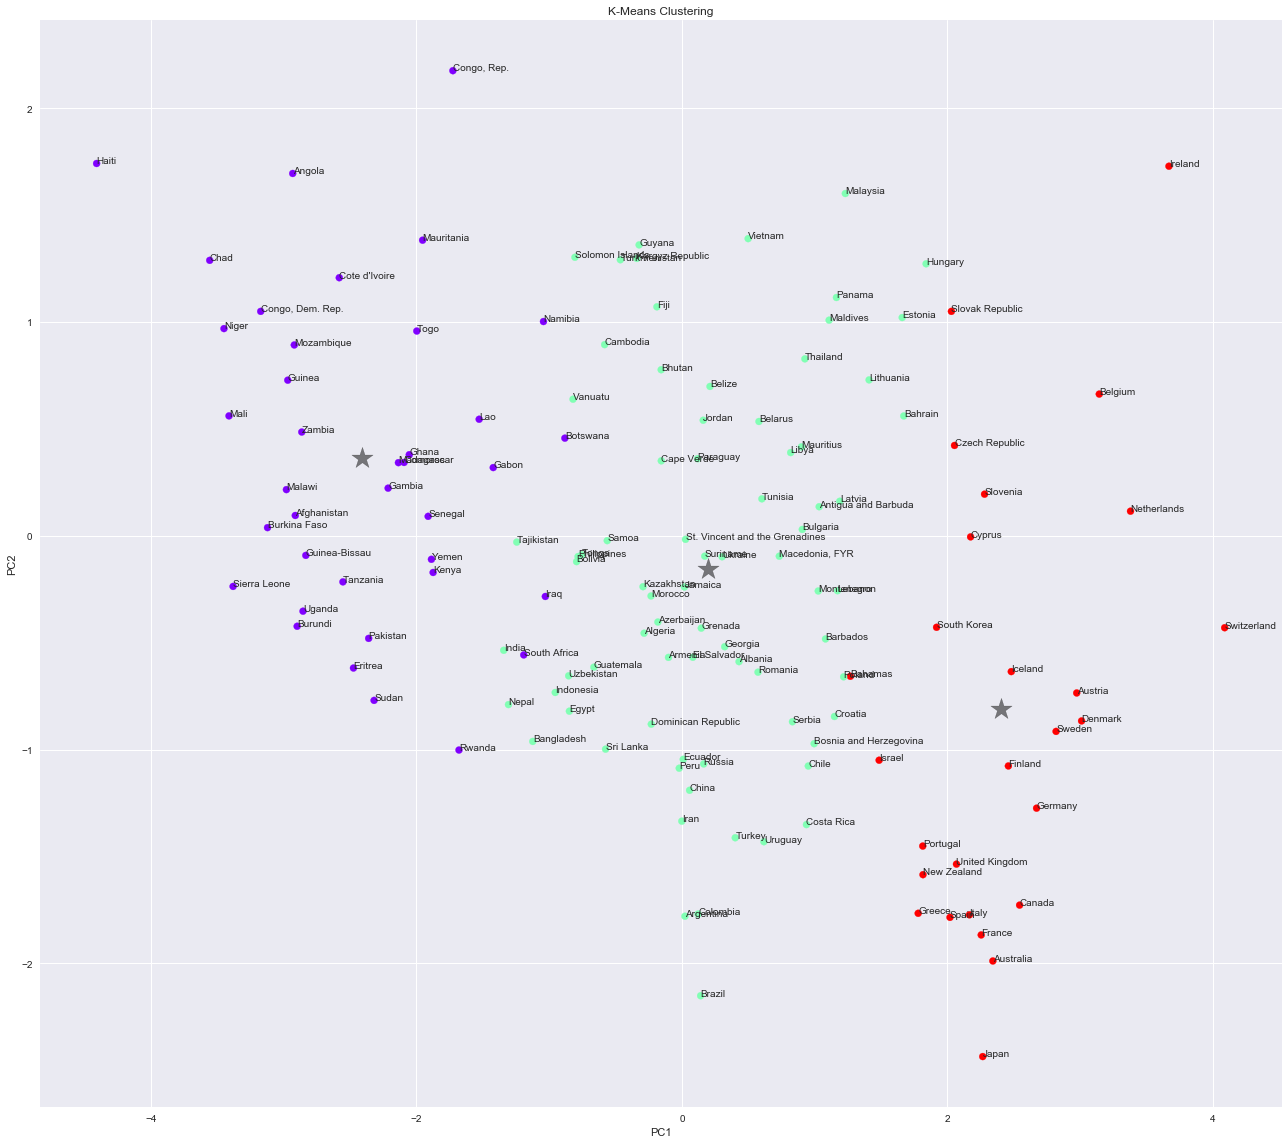

In [70]:
# Plotting Principal Components PC1 and PC2 with assigned clusters
fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(111)

plt.scatter(km_pca_country.PC1,km_pca_country.PC2, c=k_means.labels_, cmap='rainbow')
plt.scatter(k_means.cluster_centers_[:,0] ,k_means.cluster_centers_[:,1], marker='*', color='black',s=500, alpha=0.5)  
ax.set_title('K-Means Clustering')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# Code to display country names
for i, txt in enumerate(km_pca_country.country):
    plt.annotate(txt, (km_pca_country.PC1[i],km_pca_country.PC2[i]))
plt.tight_layout()

plt.show()

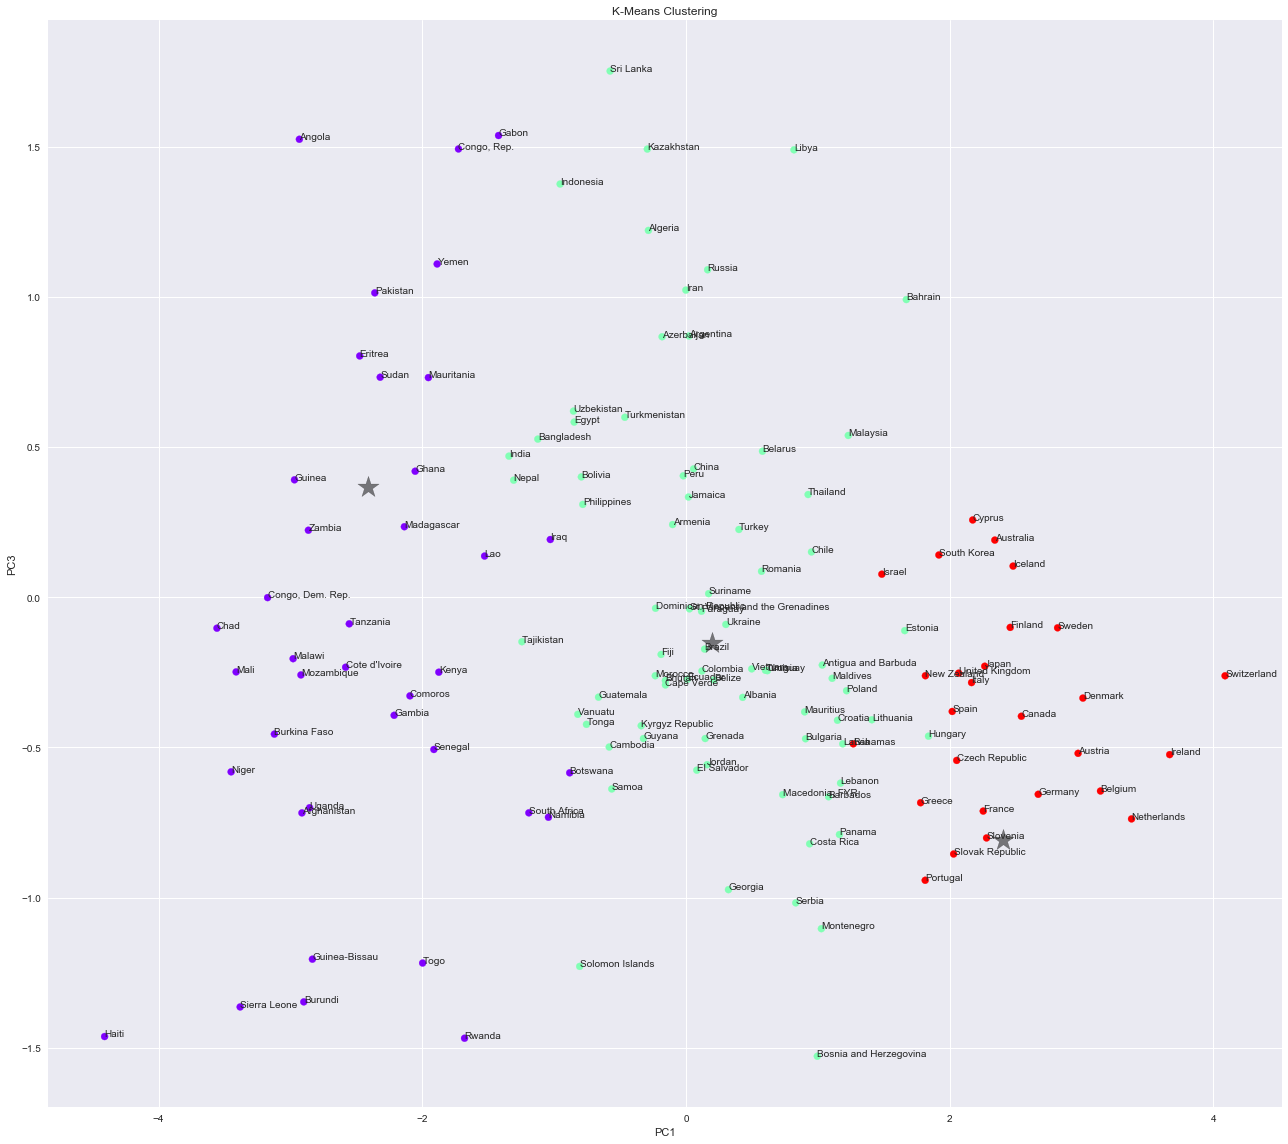

In [71]:
# Plotting Principal Components PC1 and PC3 with assigned clusters
fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(111)

plt.scatter(km_pca_country.PC1,km_pca_country.PC3, c=k_means.labels_, cmap='rainbow')
plt.scatter(k_means.cluster_centers_[:,0] ,k_means.cluster_centers_[:,1], marker='*', color='black',s=500, alpha=0.5)  
ax.set_title('K-Means Clustering')
ax.set_xlabel('PC1')
ax.set_ylabel('PC3')

# Code to display country names
for i, txt in enumerate(km_pca_country.country):
    plt.annotate(txt, (km_pca_country.PC1[i],km_pca_country.PC3[i]))
plt.tight_layout()
plt.show()


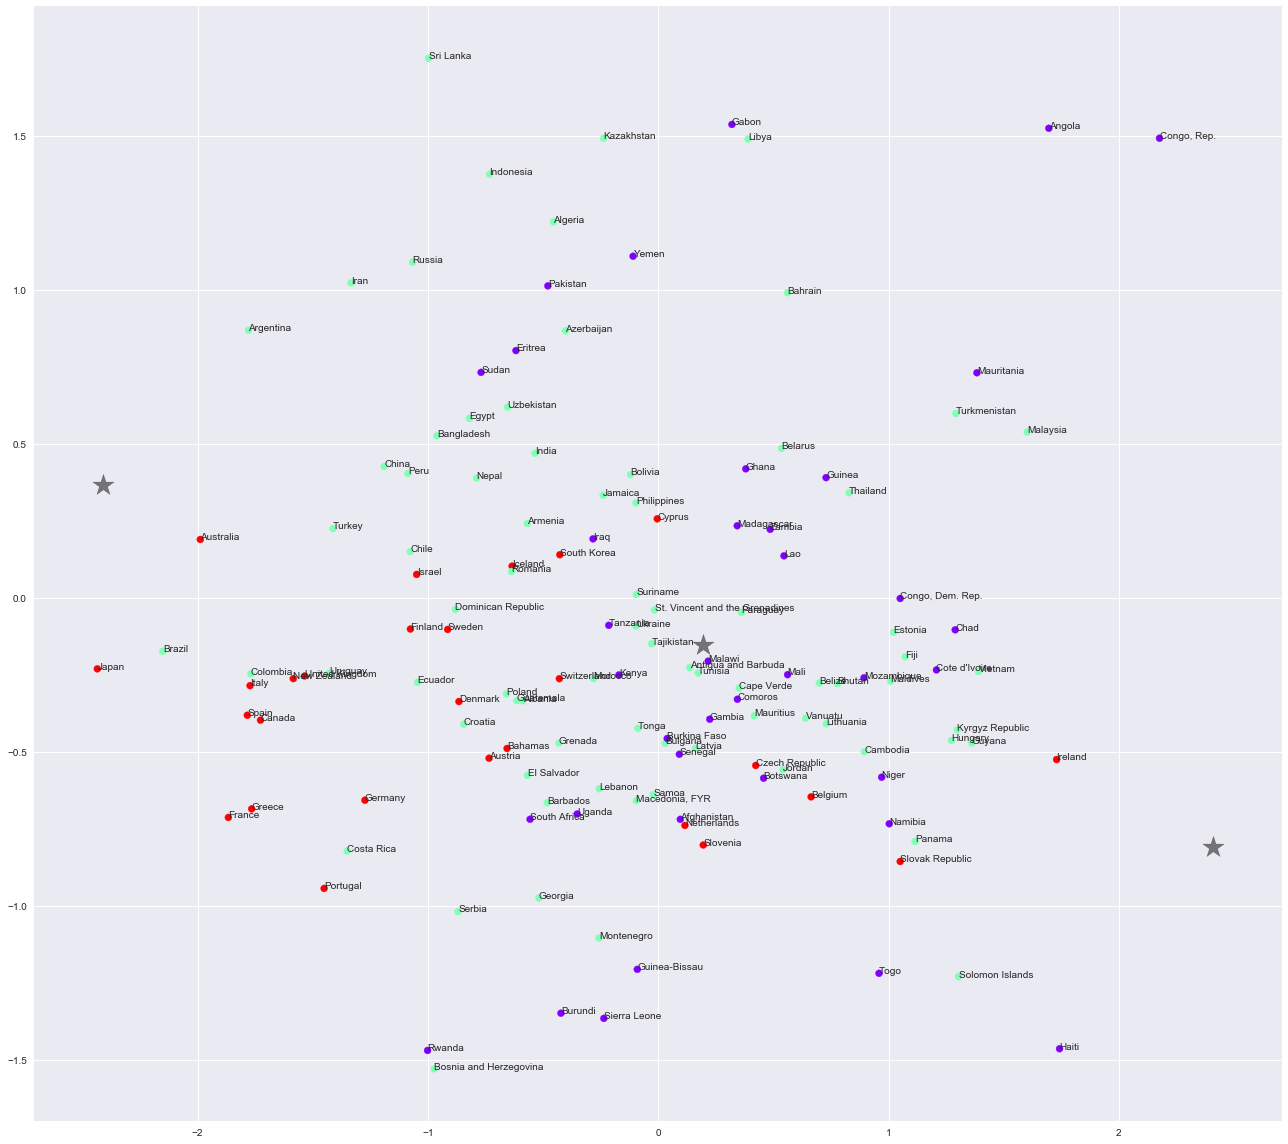

In [72]:
# Plotting Principal Components PC2 and PC3 with assigned clusters
fig = plt.figure(figsize=(18,16))

plt.scatter(km_pca_country.PC2,km_pca_country.PC3, c=k_means.labels_, cmap='rainbow')
plt.scatter(k_means.cluster_centers_[:,0] ,k_means.cluster_centers_[:,1], marker='*', color='black',s=500, alpha=0.5)  
ax.set_title('K-Means Clustering')
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')

# Code to display country names
for i, txt in enumerate(km_pca_country.country):
    plt.annotate(txt, (km_pca_country.PC2[i],km_pca_country.PC3[i]))
plt.tight_layout()
plt.show()

### Scatter Plots of Original Variables with assigned Clusters

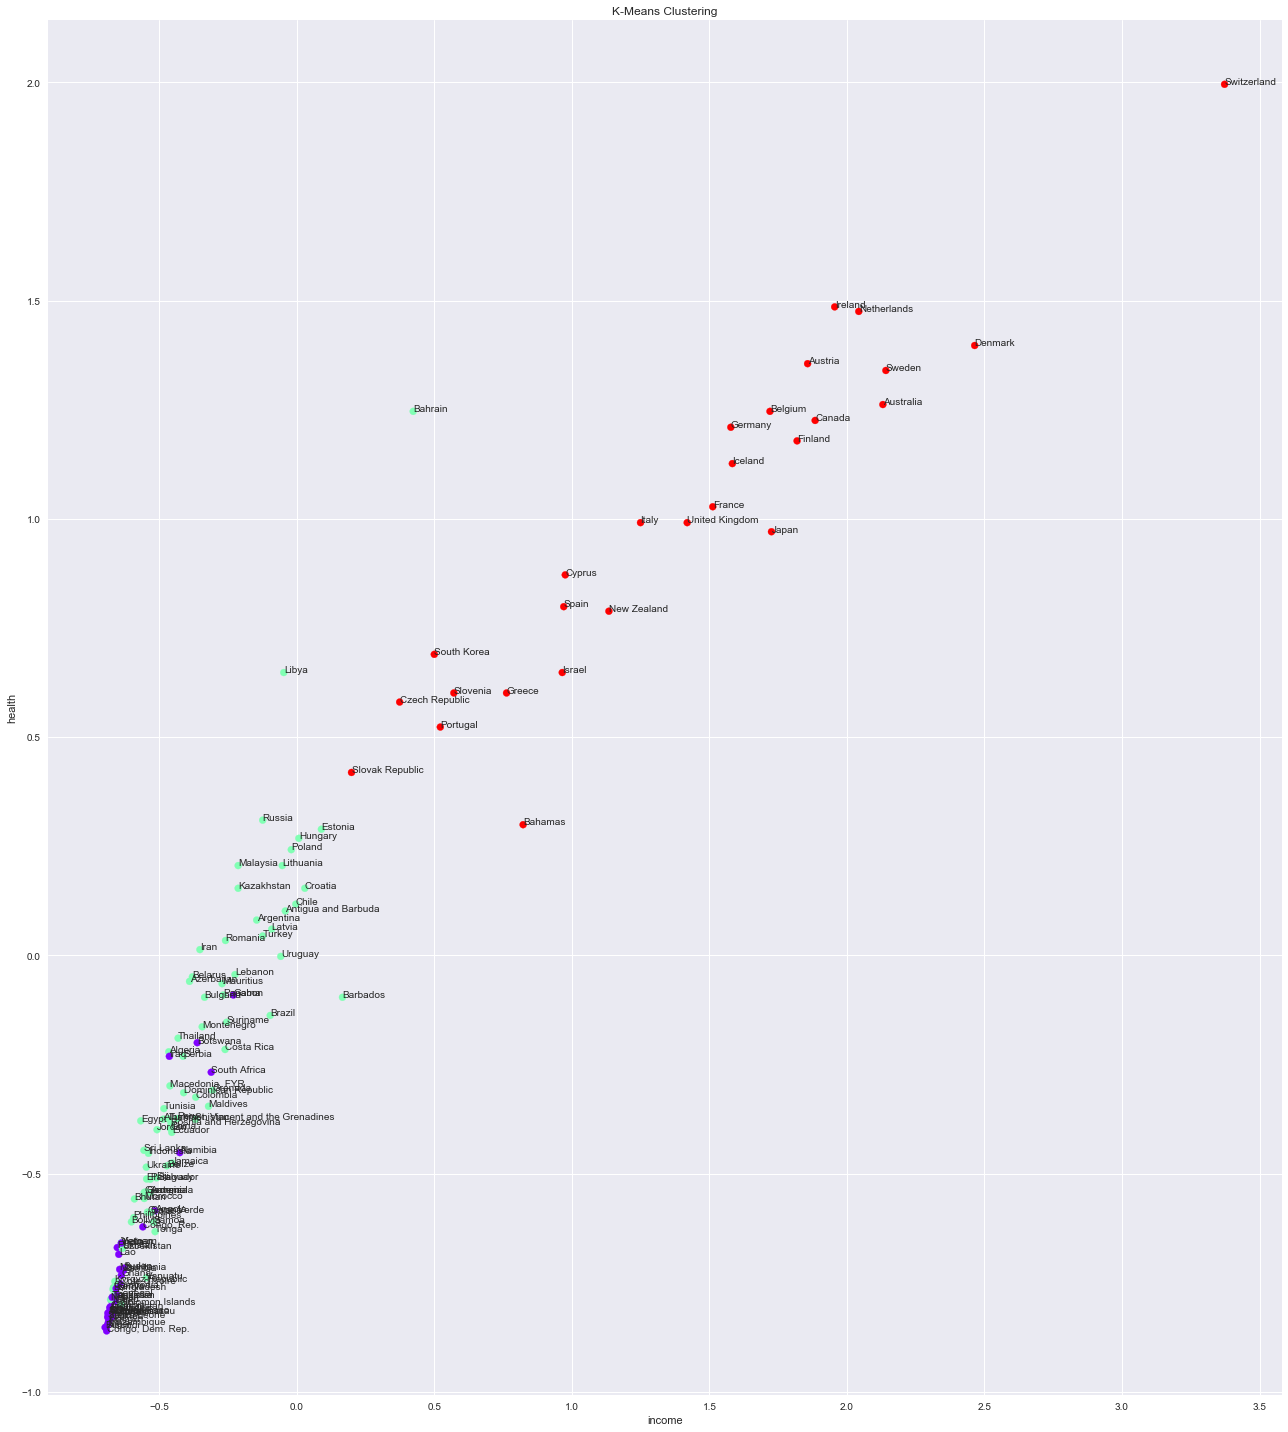

In [73]:
# Plot for income vs gdpp with assigned clusters
fig = plt.figure(figsize=(18,20))
ax = fig.add_subplot(111)

plt.scatter(km_pca_country.gdpp,km_pca_country.income, c=k_means.labels_, cmap='rainbow')
ax.set_title('K-Means Clustering')
ax.set_xlabel('income')
ax.set_ylabel('health')

# Code to display country names
for i, txt in enumerate(km_pca_country.country):
    plt.annotate(txt, (km_pca_country.gdpp[i],km_pca_country.income[i]))
plt.tight_layout()
plt.show()

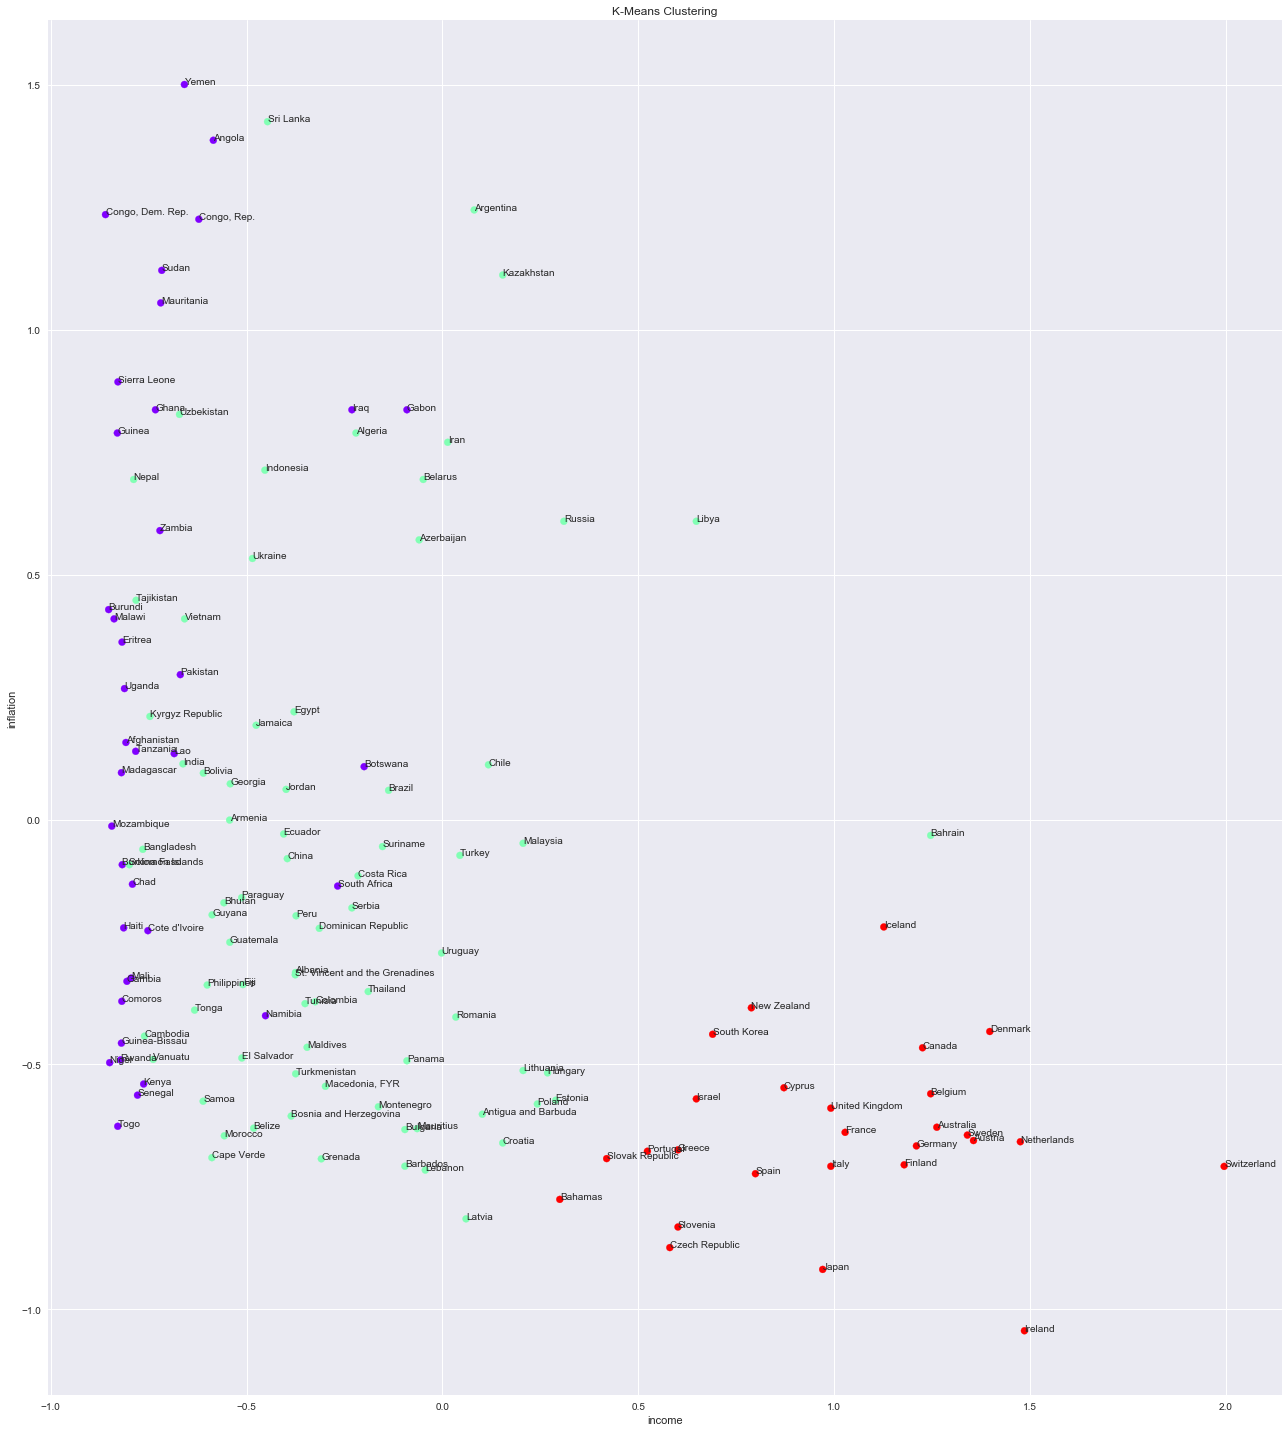

In [74]:
# Plot for income vs inflation with assigned clusters
fig = plt.figure(figsize=(18,20))
ax = fig.add_subplot(111)

plt.scatter(km_pca_country.income,km_pca_country.inflation, c=k_means.labels_, cmap='rainbow')
ax.set_title('K-Means Clustering')
ax.set_xlabel('income')
ax.set_ylabel('inflation')

# Code to display country names
for i, txt in enumerate(km_pca_country.country):
    plt.annotate(txt, (km_pca_country.income[i],km_pca_country.inflation[i]))
plt.tight_layout()
plt.show()

In [75]:
# Inspecting dataframe having Principal components, All original variables along with assigned cluster id's
km_pca_all.head()

,PC1,PC2,PC3,PC4,PC5,ClusterId,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,1,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,0,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,1,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Antigua and Barbuda


In [76]:
# No. of countries in each cluster
cluster_wise_count_all = pd.DataFrame(km_pca_all.groupby('ClusterId')['country'].count())
cluster_wise_count_all

,country
ClusterId,
0,38
1,76
2,27


### Mean Analysis for each cluster

In [77]:
# For all original variables
# Calculating mean for each assigned cluster and storing it to dataframe

# Mean for child_mort variable
child_mort_mean= pd.DataFrame(km_pca_all.groupby('ClusterId').child_mort.mean())

# Mean for exports variable
exports_mean= pd.DataFrame(km_pca_all.groupby('ClusterId').exports.mean())

# Mean for health variable 
health_mean = pd.DataFrame(km_pca_all.groupby('ClusterId').health.mean())

# Mean for imports variable
imports_mean= pd.DataFrame(km_pca_all.groupby('ClusterId').imports.mean())

# Mean for income variable
income_mean= pd.DataFrame(km_pca_all.groupby('ClusterId').income.mean())

# Mean for inflation variable
inflation_mean= pd.DataFrame(km_pca_all.groupby('ClusterId').inflation.mean())

# Mean for life_expec variable
life_expec_mean= pd.DataFrame(km_pca_all.groupby('ClusterId').life_expec.mean())

# Mean for total_fer variable
total_fer_mean= pd.DataFrame(km_pca_all.groupby('ClusterId').total_fer.mean())

# Mean for gdpp variable
gdpp_mean= pd.DataFrame(km_pca_all.groupby('ClusterId').gdpp.mean())

In [78]:
# Joining all the dataframe contains mean of original variables per cluster
km_mean_df = pd.concat([pd.Series(cluster_wise_count_all.index), 
                     child_mort_mean, exports_mean, health_mean, imports_mean, income_mean,
                     inflation_mean, life_expec_mean, total_fer_mean, gdpp_mean], axis=1)

# Assigning column to dataframe
km_mean_df.columns = ['ClusterID', 'child_mort_mean', 'exports_mean', 'health_mean', 'imports_mean', 'income_mean',
                     'inflation_mean', 'life_expec_mean', 'total_fer_mean', 'gdpp_mean']
km_mean_df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,1.303510,-0.418794,-0.238464,-0.284482,-0.707974,0.244381,-1.265603,1.364120,-0.620414
1,1,-0.418359,-0.027155,-0.234043,0.008310,-0.272058,-0.100804,0.279389,-0.437594,-0.373517
2,2,-0.838134,0.157144,1.045092,-0.122197,1.003751,-0.645684,1.094825,-0.805005,1.416863


#### Visualising mean of all original variables per cluster

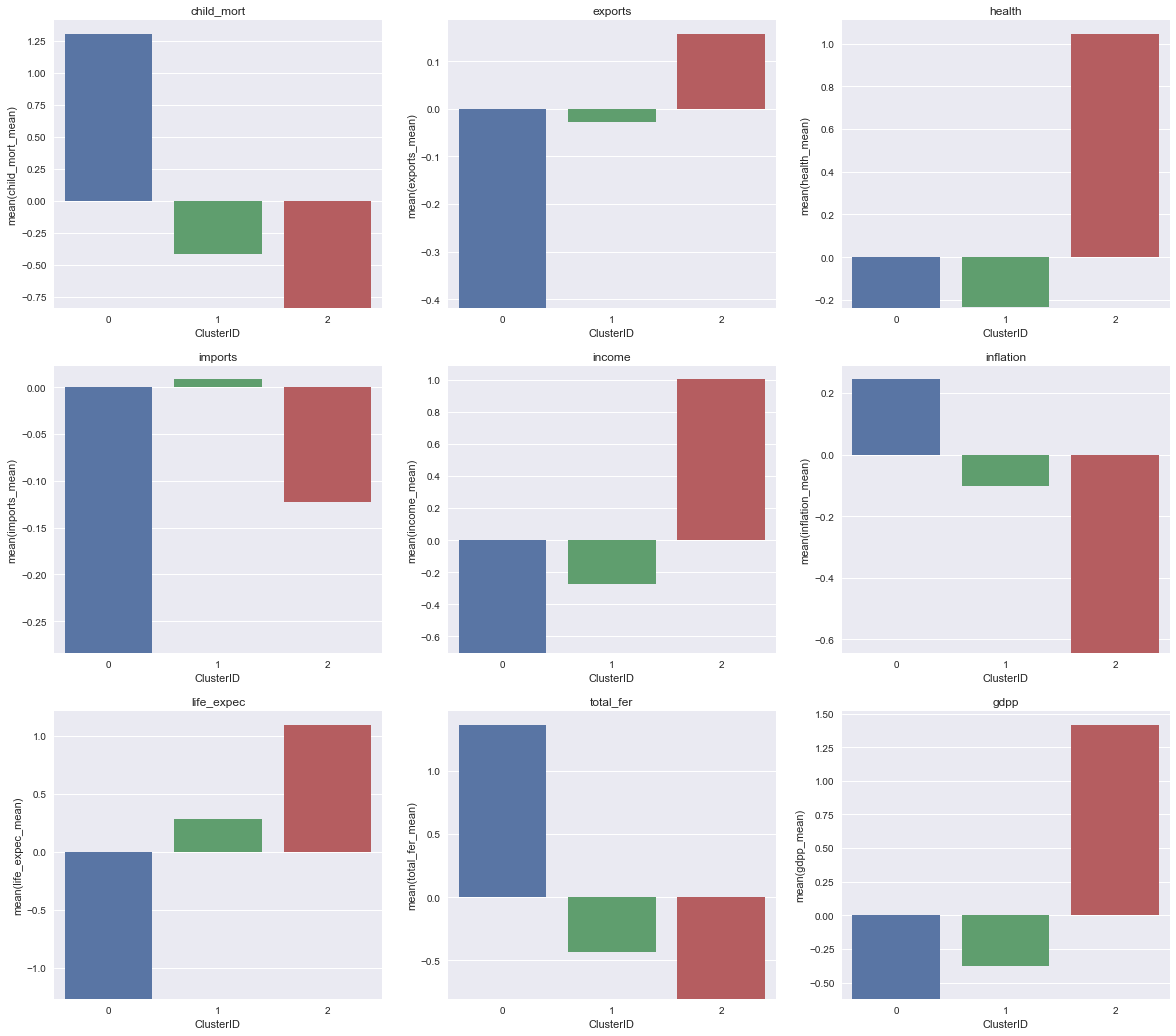

In [79]:
# Defining figure and axes for subplots
fig,ax = plt.subplots(3,3,figsize=(20,18))

# Plot for child_mort mean analysis for every cluster
sns.barplot(x = km_mean_df.ClusterID, y = km_mean_df.child_mort_mean, ax=ax[0,0])
ax[0,0].set_title('child_mort')


# Plot for exports mean analysis for every cluster
sns.barplot(x = km_mean_df.ClusterID, y = km_mean_df.exports_mean, ax=ax[0,1])
ax[0,1].set_title('exports')


# Plot for health mean analysis for every cluster
sns.barplot(x = km_mean_df.ClusterID, y = km_mean_df.health_mean, ax=ax[0,2])
ax[0,2].set_title('health')


# Plot for imports mean analysis for every cluster
sns.barplot(x = km_mean_df.ClusterID, y = km_mean_df.imports_mean, ax=ax[1,0])
ax[1,0].set_title('imports')


# Plot for income mean analysis for every cluster
sns.barplot(x = km_mean_df.ClusterID, y = km_mean_df.income_mean, ax=ax[1,1])
ax[1,1].set_title('income')


# Plot for inflation mean analysis for every cluster
sns.barplot(x = km_mean_df.ClusterID, y = km_mean_df.inflation_mean, ax=ax[1,2])
ax[1,2].set_title('inflation')


# Plot for life_expec mean analysis for every cluster
sns.barplot(x = km_mean_df.ClusterID, y = km_mean_df.life_expec_mean, ax=ax[2,0])
ax[2,0].set_title('life_expec')


# Plot for total_fer mean analysis for every cluster
sns.barplot(x = km_mean_df.ClusterID, y = km_mean_df.total_fer_mean, ax=ax[2,1])
ax[2,1].set_title('total_fer')


# Plot for gdpp mean analysis for every cluster
sns.barplot(x = km_mean_df.ClusterID, y = km_mean_df.gdpp_mean, ax=ax[2,2])
ax[2,2].set_title('gdpp')


plt.show()

### Clusters fits in criteria for funding

So we can infer from the above plots that the countries which are there in <span style="color:blue">__Cluster 0__</span> required more focus and need more money as funding.

#### Countries identified that are in the direst need of aid

In [80]:
# Making dataframe containing only original columns and assigned clusters
kmeans_cluster_0 = km_pca_all[['ClusterId','country','child_mort','exports','health','imports','income',
                        'inflation','life_expec','total_fer','gdpp']]

# Selecting countries assigned ClusterId = 0
kmeans_cluster_0 = kmeans_cluster_0.loc[kmeans_cluster_0['ClusterId'] == 0]
print('No. of countries required aide:', len(kmeans_cluster_0))
kmeans_cluster_0

No. of countries required aide: 38


,ClusterId,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
3,0,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
21,0,Botswana,0.353908,0.091147,0.541996,0.182698,-0.200033,0.107996,-1.517586,-0.045030,-0.361949
25,0,Burkina Faso,1.933196,-0.801651,-0.027638,-0.716337,-0.817611,-0.092213,-1.427359,1.936010,-0.677976
26,0,Burundi,1.376093,-1.177797,1.746991,-0.318607,-0.852261,0.428709,-1.449916,2.194407,-0.696801
32,0,Chad,2.778798,-0.157666,-0.834619,-0.140457,-0.791596,-0.132065,-1.585257,2.413050,-0.660355
36,0,Comoros,1.241791,-0.900444,-0.841922,0.199270,-0.818651,-0.371177,-0.525087,1.193948,-0.667359
37,0,"Congo, Dem. Rep.",1.933196,-0.000328,0.399588,0.112267,-0.860326,1.235237,-1.472473,2.379922,-0.691164
38,0,"Congo, Rep.",0.637434,1.609635,-1.590479,0.323561,-0.621984,1.225748,-1.145399,1.326459,-0.559500
40,0,Cote d'Ivoire,1.808842,0.347277,-0.553454,-0.148743,-0.752055,-0.226950,-1.607814,1.538477,-0.642679


### Analysing individual countries selected for funding from cluster = 3

In [81]:
# Selected country - 'Afghanistan', 'Botswana','Chad'
sel_country = kmeans_cluster_0.loc[kmeans_cluster_0['country'].isin(['Afghanistan','Botswana','Chad'])]
sel_country

,ClusterId,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
21,0,Botswana,0.353908,0.091147,0.541996,0.182698,-0.200033,0.107996,-1.517586,-0.045030,-0.361949
32,0,Chad,2.778798,-0.157666,-0.834619,-0.140457,-0.791596,-0.132065,-1.585257,2.413050,-0.660355


### K-means for <span style="color:blue">__no of cluster, K = 4__</span>

In [82]:
# Kmeans with K=4
k_means_4= KMeans(n_clusters = 4, max_iter=50, random_state=42)
k_means_4.fit(Kmeans_cluster_4)
print(k_means_4.cluster_centers_)
print("\n")
print('Number of iterations: ',k_means_4.n_iter_)

[[ 2.43553286 -0.93093528 -0.34187004  0.79157995 -0.09950214]
 [ 0.66613551  0.38033258 -0.3305923  -0.79918651  0.2124614 ]
 [-0.30149495 -0.74446182  0.31092965 -0.75495169 -0.00703203]
 [-2.44754906  0.38318146 -0.13029703  0.59605382 -0.32820964]]


Number of iterations:  8


#### Joining clustered data with original variables

In [83]:
# Storing identified clusters into dataframe
k_means_4_labels = pd.DataFrame(k_means_4.labels_, columns = ['ClusterId'])

# Retaining index
k_means_4_labels.index = Kmeans_cluster_4.index

# Concatenating assigned Clusters with original dataframe
Kmeans_cluster_4 = pd.concat([Kmeans_cluster_4,k_means_4_labels], axis=1)
Kmeans_cluster_4.head(20)

,PC1,PC2,PC3,PC4,PC5,ClusterId
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,3
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,1
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,2
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,3
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,1
5,0.022407,-1.779187,0.869997,-0.036967,0.981057,2
6,-0.101584,-0.568252,0.242092,-1.466266,-0.055992,2
7,2.342165,-1.988459,0.190344,1.105038,-0.731192,0
8,2.973764,-0.734689,-0.519766,1.205442,0.083580,0
9,-0.181487,-0.402866,0.867459,-0.438773,0.137350,2


#### Adding all orginal variables to clustered dataframe

In [84]:
km_4_pca_all = Kmeans_cluster_4.join(country_scaled_df)
km_4_pca_all.head(20)

,PC1,PC2,PC3,PC4,PC5,ClusterId,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,3,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,1,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Antigua and Barbuda
5,0.022407,-1.779187,0.869997,-0.036967,0.981057,2,-0.591177,-0.812628,0.468966,-1.279787,0.080920,1.244725,0.591474,-0.382933,-0.145791,Argentina
6,-0.101584,-0.568252,0.242092,-1.466266,-0.055992,2,-0.501643,-0.743107,-0.882089,-0.065883,-0.543421,-0.001123,0.309514,-0.833471,-0.533233,Armenia
7,2.342165,-1.988459,0.190344,1.105038,-0.731192,0,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699,Australia
8,2.973764,-0.734689,-0.519766,1.205442,0.083580,0,-0.844858,0.372890,1.527901,0.037693,1.355617,-0.655549,1.121559,-0.999109,1.857082,Austria
9,-0.181487,-0.402866,0.867459,-0.438773,0.137350,2,0.023128,0.482661,-0.341667,-1.085065,-0.059556,0.571037,-0.164178,-0.681083,-0.389857,Azerbaijan


In [85]:
# Number of countries falling in each clusters
cluster_4_wise_count = km_4_pca_all.groupby('ClusterId')['country'].count().reset_index()
cluster_4_wise_count

,ClusterId,country
0,0,25
1,1,43
2,2,36
3,3,37


### Scatter Plots of some Principal Components with assigned Clusters
Visualising PC1, PC2, PC3 with assigned clusters

In [86]:
# Since the dataframe contain distorted index so for scatter plot resetting index
km_4_pca_country = km_4_pca_all.reset_index(drop=True)
km_4_pca_country.head(5)

,PC1,PC2,PC3,PC4,PC5,ClusterId,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,3,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,1,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Antigua and Barbuda


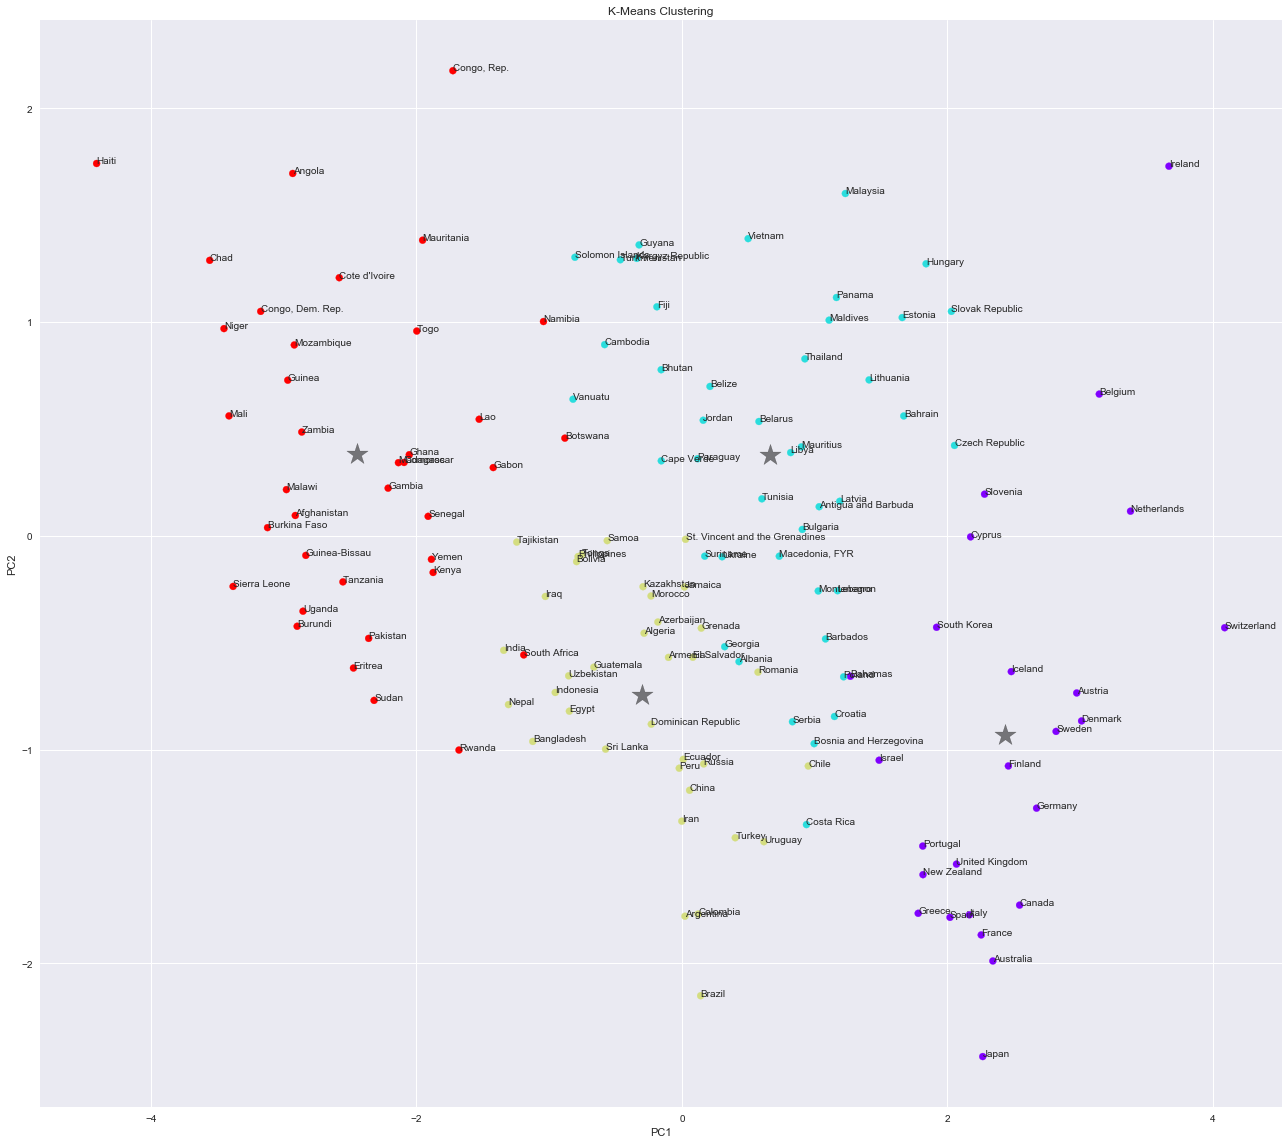

In [87]:
# Plotting Principal Components PC1 and PC2 with assigned clusters
fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(111)

plt.scatter(km_4_pca_country.PC1,km_4_pca_country.PC2, c=k_means_4.labels_, cmap='rainbow')
plt.scatter(k_means_4.cluster_centers_[:,0] ,k_means_4.cluster_centers_[:,1], marker='*', color='black',s=500, alpha=0.5)  
ax.set_title('K-Means Clustering')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# Code to display country names
for i, txt in enumerate(km_4_pca_country.country):
    plt.annotate(txt, (km_4_pca_country.PC1[i],km_4_pca_country.PC2[i]))
plt.tight_layout()

plt.show()

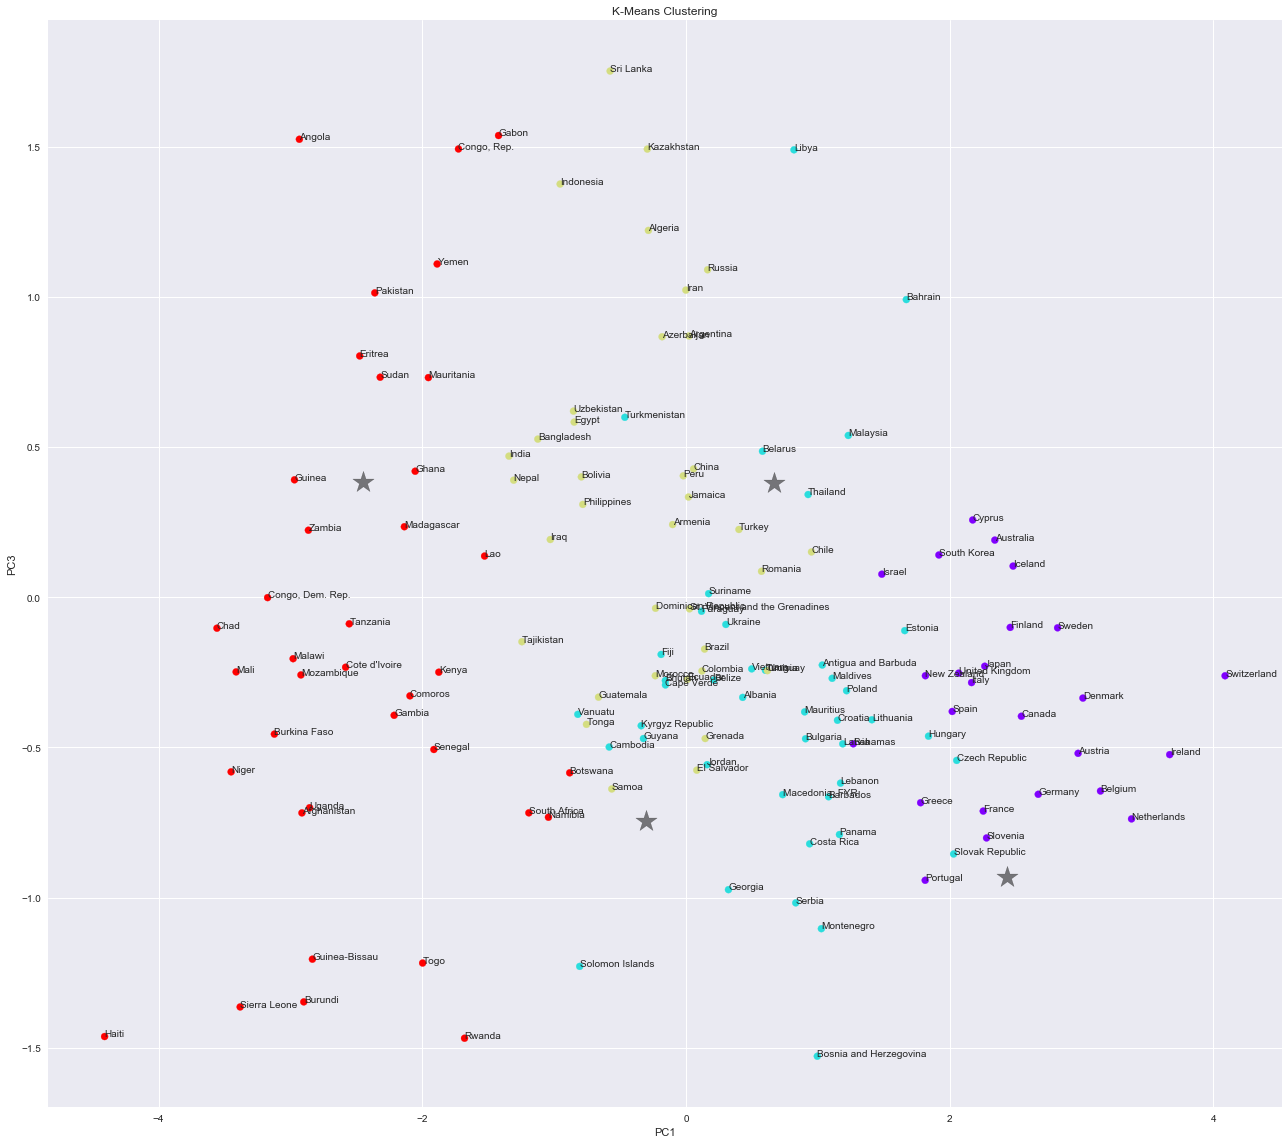

In [88]:
# Plotting Principal Components PC1 and PC3 with assigned clusters
fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(111)

plt.scatter(km_4_pca_country.PC1,km_4_pca_country.PC3, c=k_means_4.labels_, cmap='rainbow')
plt.scatter(k_means_4.cluster_centers_[:,0] ,k_means_4.cluster_centers_[:,1], marker='*', color='black',s=500, alpha=0.5)  
ax.set_title('K-Means Clustering')
ax.set_xlabel('PC1')
ax.set_ylabel('PC3')

# Code to display country names
for i, txt in enumerate(km_4_pca_country.country):
    plt.annotate(txt, (km_4_pca_country.PC1[i],km_4_pca_country.PC3[i]))
plt.tight_layout()
plt.show()


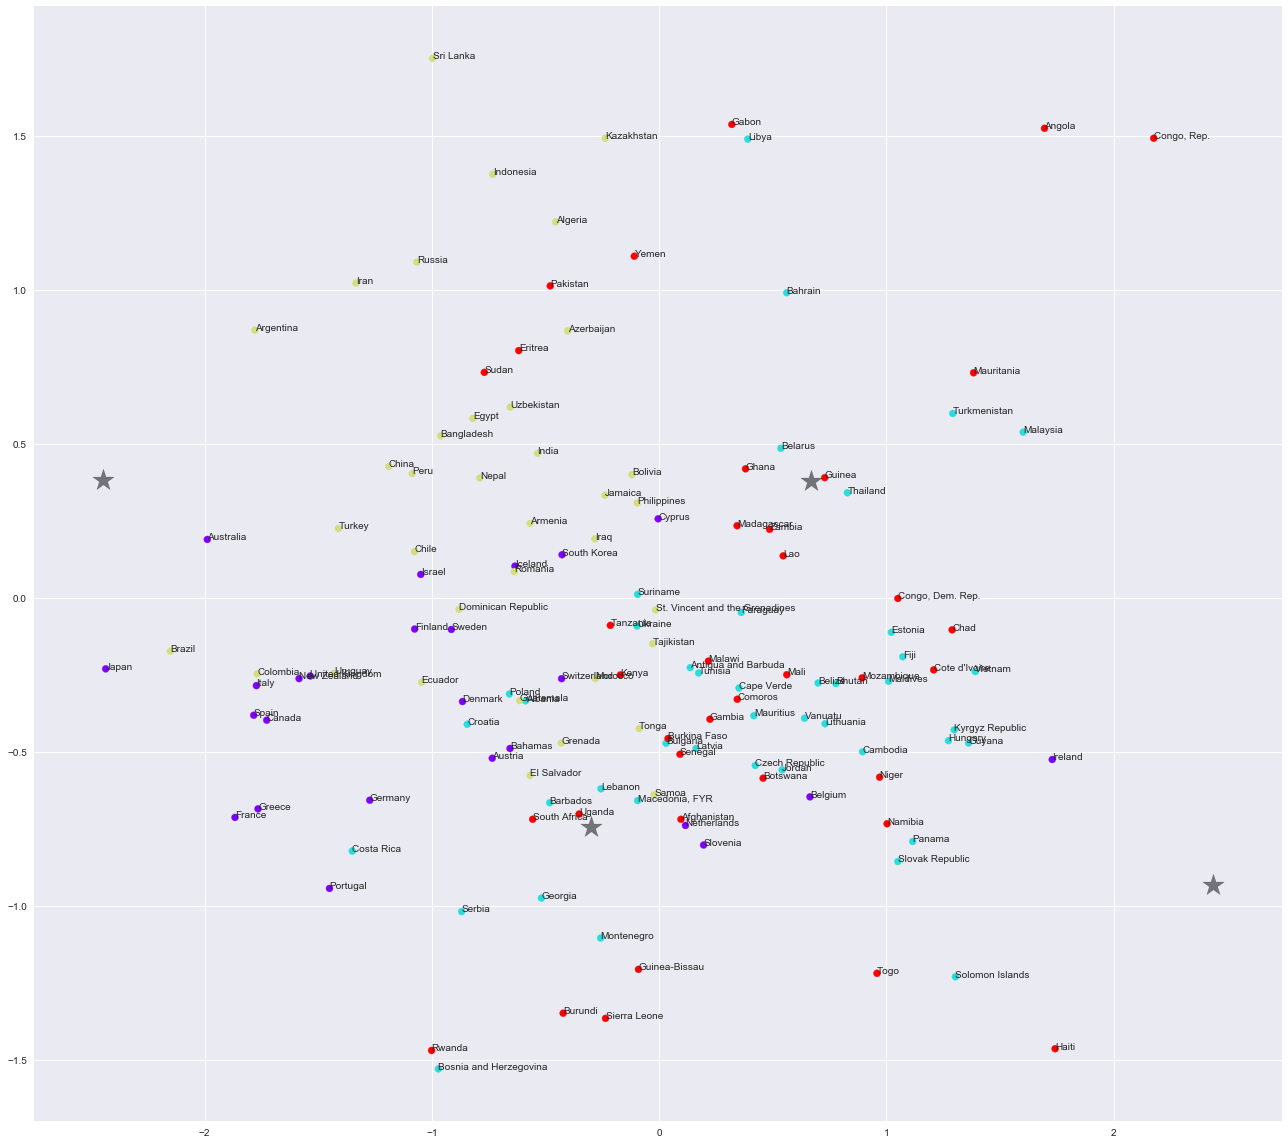

In [89]:
# Plotting Principal Components PC2 and PC3 with assigned clusters
fig = plt.figure(figsize=(18,16))

plt.scatter(km_4_pca_country.PC2,km_4_pca_country.PC3, c=k_means_4.labels_, cmap='rainbow')
plt.scatter(k_means_4.cluster_centers_[:,0] ,k_means_4.cluster_centers_[:,1], marker='*', color='black',s=500, alpha=0.5)  
ax.set_title('K-Means Clustering')
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')

# Code to display country names
for i, txt in enumerate(km_4_pca_country.country):
    plt.annotate(txt, (km_4_pca_country.PC2[i],km_4_pca_country.PC3[i]))
plt.tight_layout()
plt.show()

### Scatter Plots of Original Variables with assigned Clusters

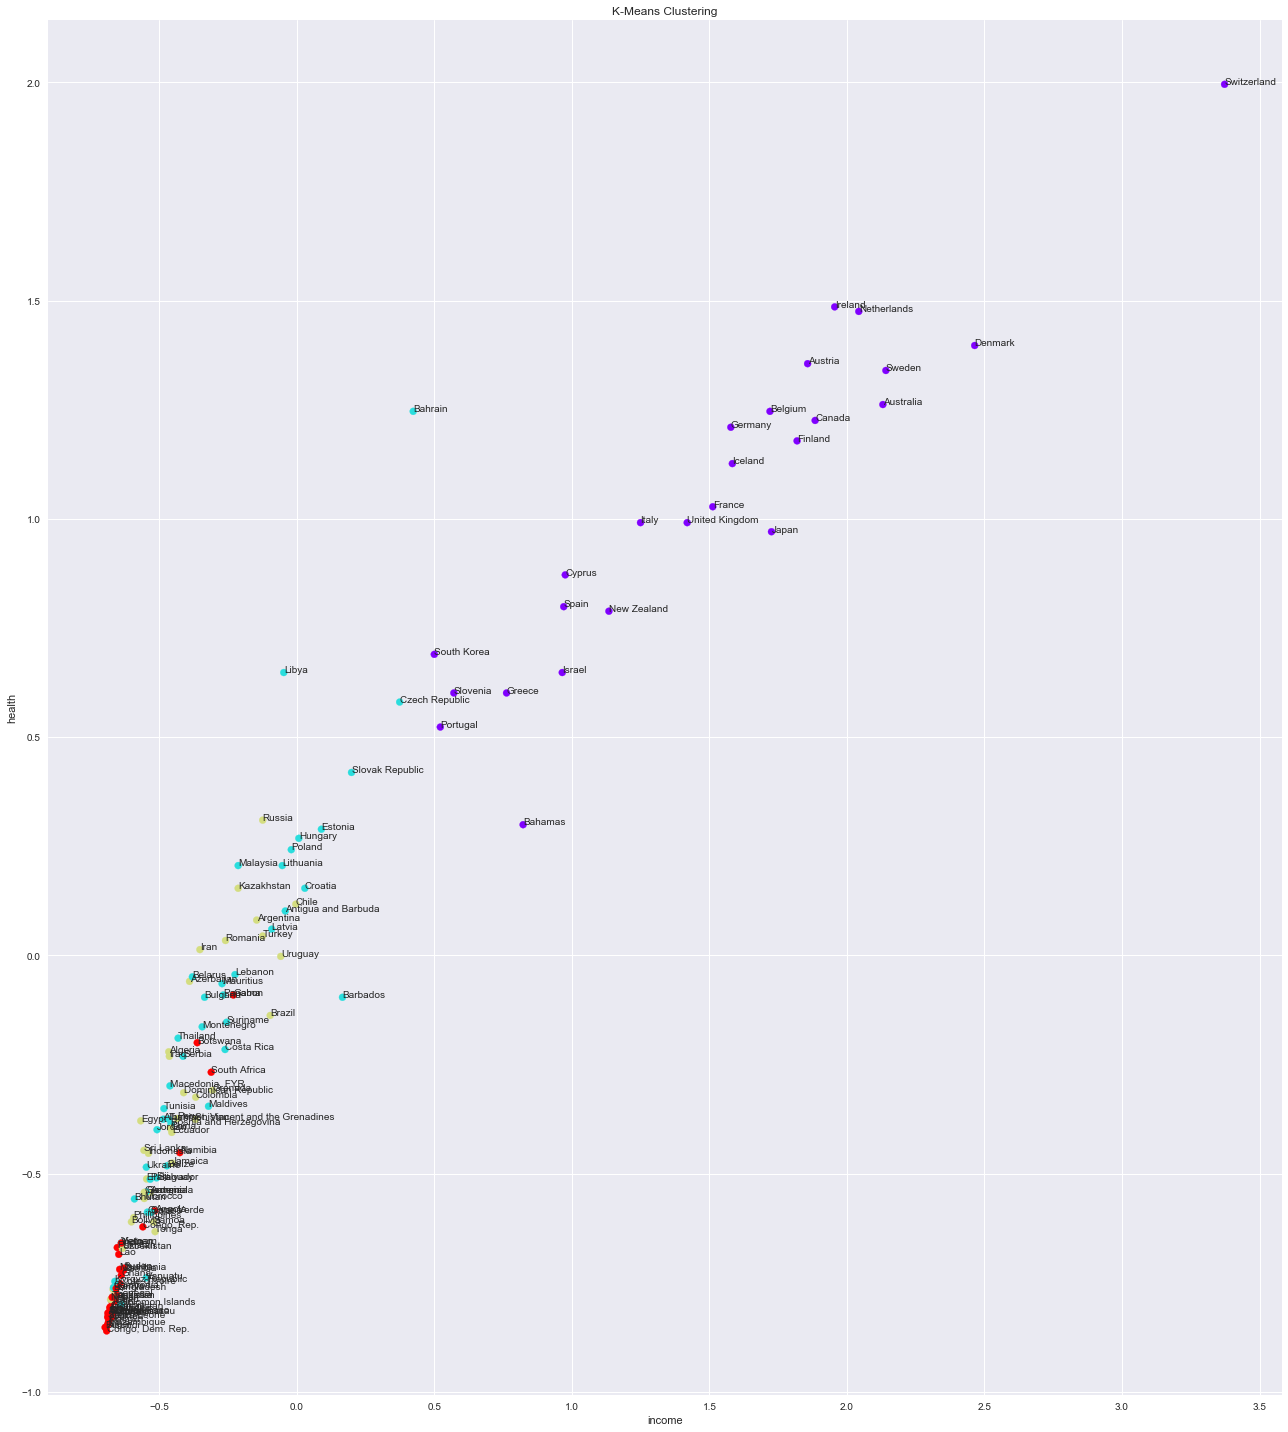

In [90]:
# Plot for income vs gdpp with assigned clusters
fig = plt.figure(figsize=(18,20))
ax = fig.add_subplot(111)

plt.scatter(km_4_pca_country.gdpp,km_4_pca_country.income, c=k_means_4.labels_, cmap='rainbow')
ax.set_title('K-Means Clustering')
ax.set_xlabel('income')
ax.set_ylabel('health')

# Code to display country names
for i, txt in enumerate(km_4_pca_country.country):
    plt.annotate(txt, (km_4_pca_country.gdpp[i],km_4_pca_country.income[i]))
plt.tight_layout()
plt.show()

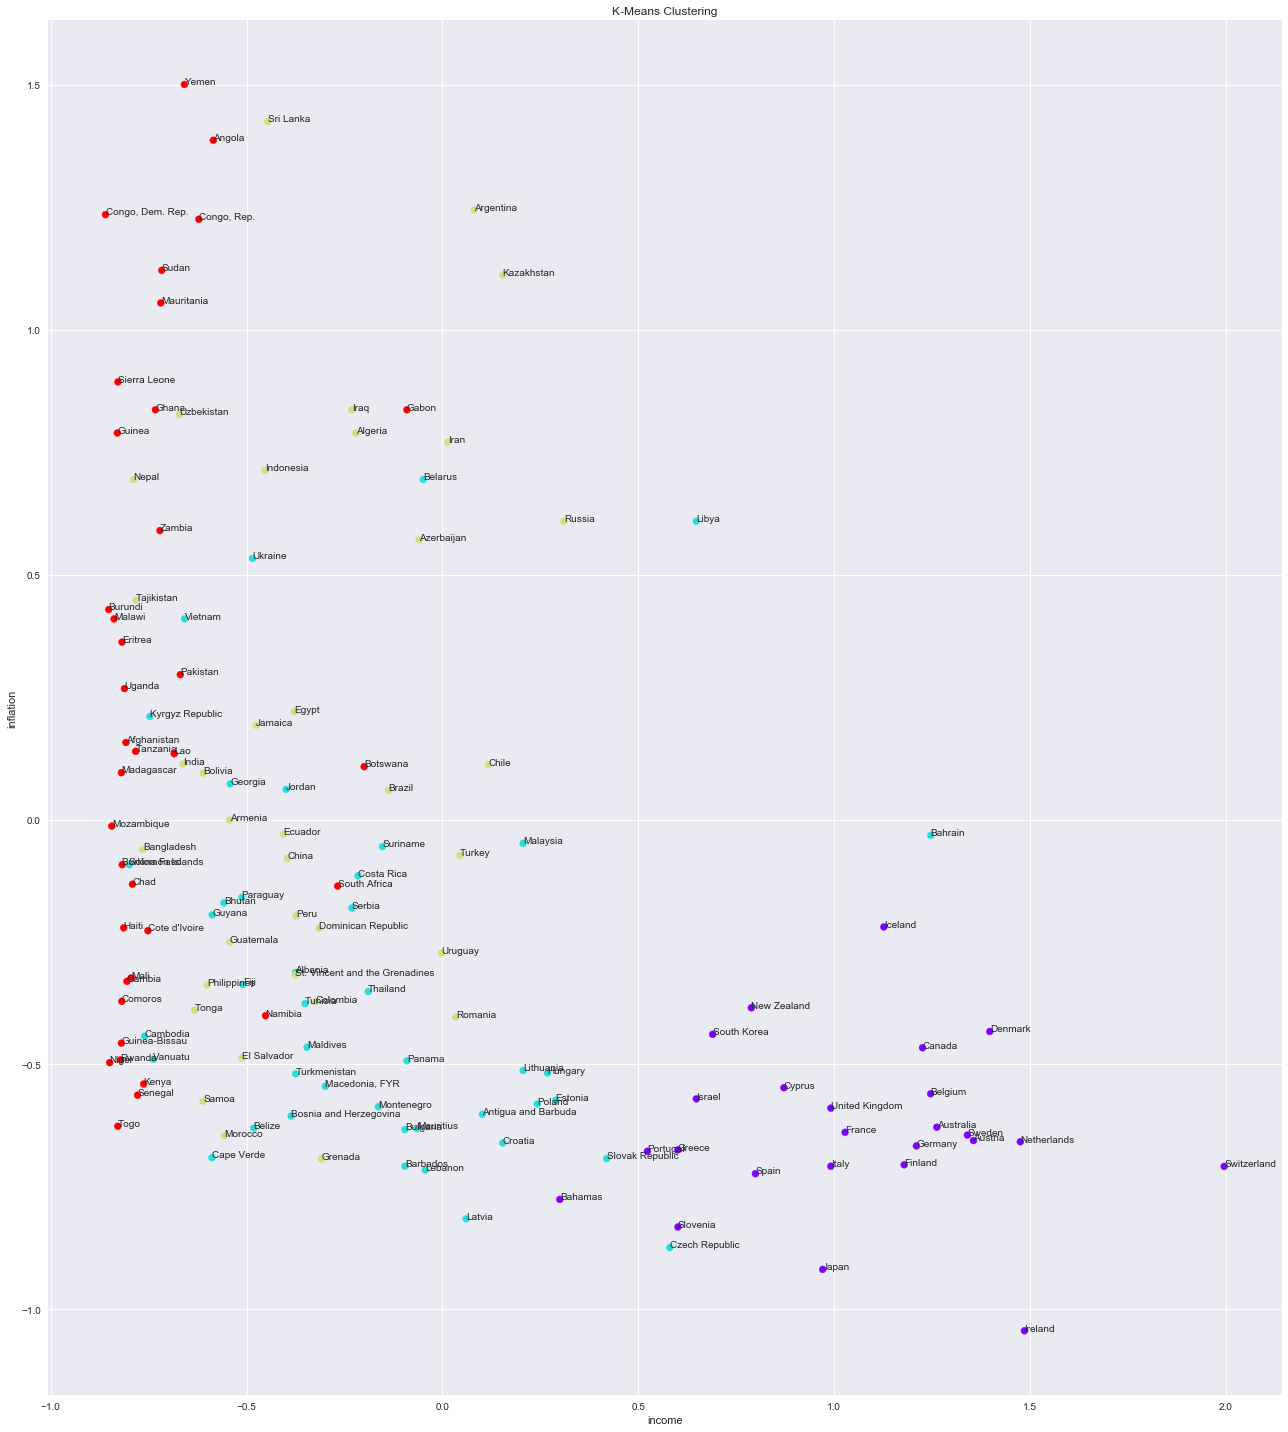

In [91]:
# Plot for income vs inflation with assigned clusters
fig = plt.figure(figsize=(18,20))
ax = fig.add_subplot(111)

plt.scatter(km_4_pca_country.income,km_4_pca_country.inflation, c=k_means_4.labels_, cmap='rainbow')
ax.set_title('K-Means Clustering')
ax.set_xlabel('income')
ax.set_ylabel('inflation')

# Code to display country names
for i, txt in enumerate(km_4_pca_country.country):
    plt.annotate(txt, (km_4_pca_country.income[i],km_4_pca_country.inflation[i]))
plt.tight_layout()
plt.show()

In [92]:
# Inspecting dataframe having Principal components, All original variables along with assigned cluster id's
km_4_pca_all.head()

,PC1,PC2,PC3,PC4,PC5,ClusterId,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,3,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,1,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Antigua and Barbuda


In [93]:
# No. of countries in each cluster
cluster_4_wise_count_all = pd.DataFrame(km_4_pca_all.groupby('ClusterId')['country'].count())
cluster_4_wise_count_all

,country
ClusterId,
0,25
1,43
2,36
3,37


### Mean Analysis for each cluster

In [94]:
# For all original variables
# Calculating mean for each assigned cluster and storing it to dataframe

# Mean for child_mort variable
child_mort_mean_4 = pd.DataFrame(km_4_pca_all.groupby('ClusterId').child_mort.mean())

# Mean for exports variable
exports_mean_4 = pd.DataFrame(km_4_pca_all.groupby('ClusterId').exports.mean())

# Mean for health variable 
health_mean_4 = pd.DataFrame(km_4_pca_all.groupby('ClusterId').health.mean())

# Mean for imports variable
imports_mean_4 = pd.DataFrame(km_4_pca_all.groupby('ClusterId').imports.mean())

# Mean for income variable
income_mean_4 = pd.DataFrame(km_4_pca_all.groupby('ClusterId').income.mean())

# Mean for inflation variable
inflation_mean_4 = pd.DataFrame(km_4_pca_all.groupby('ClusterId').inflation.mean())

# Mean for life_expec variable
life_expec_mean_4 = pd.DataFrame(km_4_pca_all.groupby('ClusterId').life_expec.mean())

# Mean for total_fer variable
total_fer_mean_4 = pd.DataFrame(km_4_pca_all.groupby('ClusterId').total_fer.mean())

# Mean for gdpp variable
gdpp_mean_4 = pd.DataFrame(km_4_pca_all.groupby('ClusterId').gdpp.mean())

In [95]:
# Joining all the dataframe contains mean of original variables per cluster
km_4_mean_df = pd.concat([pd.Series(cluster_4_wise_count_all.index), 
                     child_mort_mean_4, exports_mean_4, health_mean_4, imports_mean_4, income_mean_4,
                     inflation_mean_4, life_expec_mean_4, total_fer_mean_4, gdpp_mean_4], axis=1)

# Assigning column to dataframe
km_4_mean_df.columns = ['ClusterID', 'child_mort_mean', 'exports_mean', 'health_mean', 'imports_mean', 'income_mean',
                     'inflation_mean', 'life_expec_mean', 'total_fer_mean', 'gdpp_mean']
km_4_mean_df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,-0.839387,0.081780,1.084317,-0.209728,1.044071,-0.634681,1.128777,-0.791067,1.507291
1,1,-0.527844,0.442071,-0.027298,0.522715,-0.173837,-0.321311,0.326301,-0.558587,-0.301478
2,2,-0.299361,-0.526026,-0.414494,-0.567533,-0.345366,0.150710,0.226806,-0.281341,-0.425385
3,3,1.339660,-0.428422,-0.260643,-0.277849,-0.720859,0.228372,-1.289580,1.372122,-0.624663


#### Visualising mean of all original variables per cluster

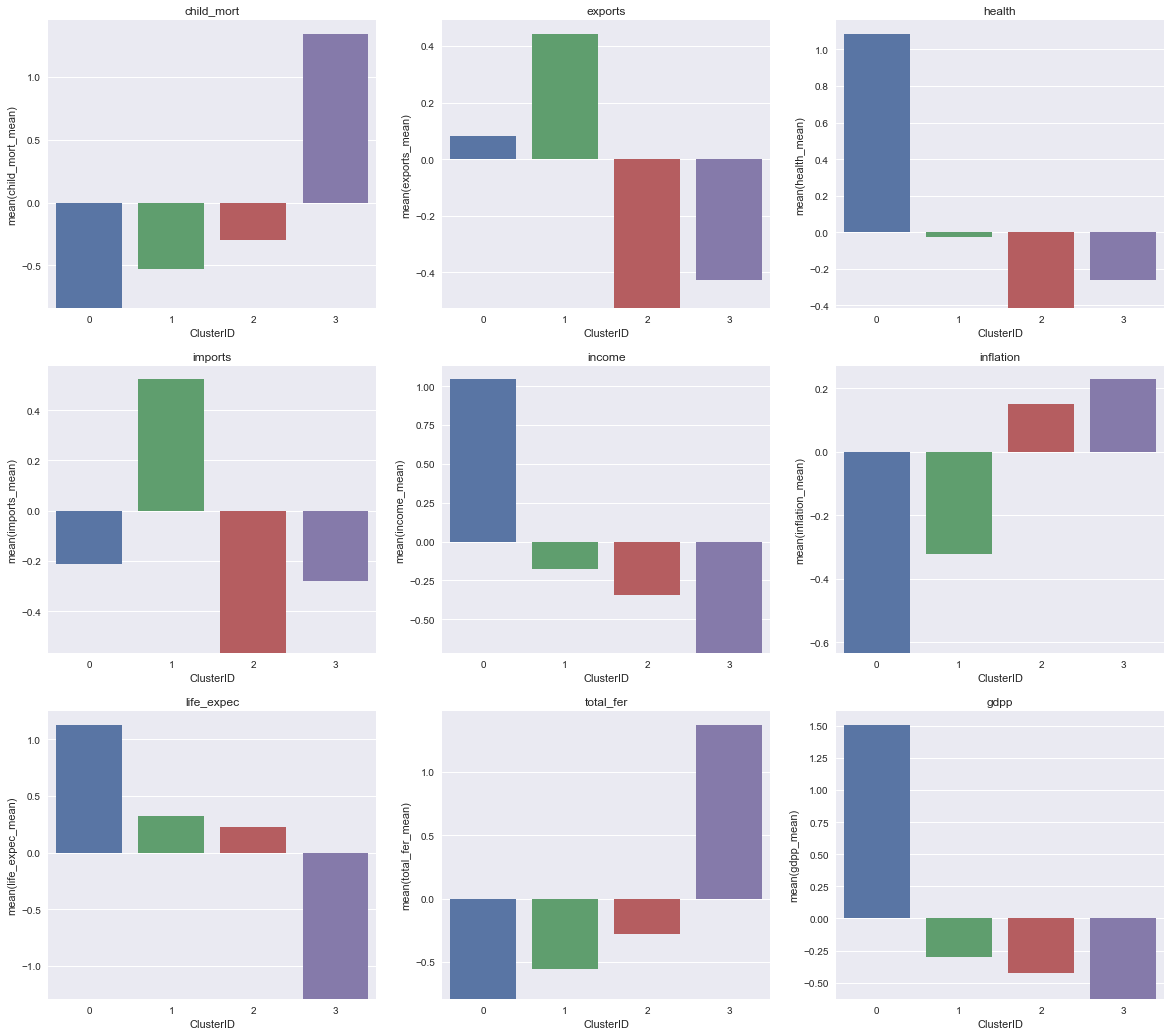

In [96]:
# Defining figure and axes for subplots
fig,ax = plt.subplots(3,3,figsize=(20,18))

# Plot for child_mort mean analysis for every cluster
sns.barplot(x = km_4_mean_df.ClusterID, y = km_4_mean_df.child_mort_mean, ax=ax[0,0])
ax[0,0].set_title('child_mort')


# Plot for exports mean analysis for every cluster
sns.barplot(x = km_4_mean_df.ClusterID, y = km_4_mean_df.exports_mean, ax=ax[0,1])
ax[0,1].set_title('exports')


# Plot for health mean analysis for every cluster
sns.barplot(x = km_4_mean_df.ClusterID, y = km_4_mean_df.health_mean, ax=ax[0,2])
ax[0,2].set_title('health')


# Plot for imports mean analysis for every cluster
sns.barplot(x = km_4_mean_df.ClusterID, y = km_4_mean_df.imports_mean, ax=ax[1,0])
ax[1,0].set_title('imports')


# Plot for income mean analysis for every cluster
sns.barplot(x = km_4_mean_df.ClusterID, y = km_4_mean_df.income_mean, ax=ax[1,1])
ax[1,1].set_title('income')


# Plot for inflation mean analysis for every cluster
sns.barplot(x = km_4_mean_df.ClusterID, y = km_4_mean_df.inflation_mean, ax=ax[1,2])
ax[1,2].set_title('inflation')


# Plot for life_expec mean analysis for every cluster
sns.barplot(x = km_4_mean_df.ClusterID, y = km_4_mean_df.life_expec_mean, ax=ax[2,0])
ax[2,0].set_title('life_expec')


# Plot for total_fer mean analysis for every cluster
sns.barplot(x = km_4_mean_df.ClusterID, y = km_4_mean_df.total_fer_mean, ax=ax[2,1])
ax[2,1].set_title('total_fer')


# Plot for gdpp mean analysis for every cluster
sns.barplot(x = km_4_mean_df.ClusterID, y = km_4_mean_df.gdpp_mean, ax=ax[2,2])
ax[2,2].set_title('gdpp')


plt.show()

### Clusters fits in criteria for funding

So we can infer from the above plots that the countries which are there in <span style="color:blue">__Cluster 3__</span> required more focus and need more money as funding.

#### Countries identified that are in the direst need of aid

In [97]:
# Making dataframe containing only original columns and assigned clusters
kmeans_cluster_4 = km_4_pca_all[['ClusterId','country','child_mort','exports','health','imports','income',
                        'inflation','life_expec','total_fer','gdpp']]

# Selecting countries assigned ClusterId = 3
kmeans_cluster_4 = kmeans_cluster_4.loc[km_4_pca_all['ClusterId'] == 3]
print('No. of countries required aide:', len(kmeans_cluster_4))
kmeans_cluster_4

No. of countries required aide: 37


,ClusterId,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,3,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
3,3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
21,3,Botswana,0.353908,0.091147,0.541996,0.182698,-0.200033,0.107996,-1.517586,-0.045030,-0.361949
25,3,Burkina Faso,1.933196,-0.801651,-0.027638,-0.716337,-0.817611,-0.092213,-1.427359,1.936010,-0.677976
26,3,Burundi,1.376093,-1.177797,1.746991,-0.318607,-0.852261,0.428709,-1.449916,2.194407,-0.696801
32,3,Chad,2.778798,-0.157666,-0.834619,-0.140457,-0.791596,-0.132065,-1.585257,2.413050,-0.660355
36,3,Comoros,1.241791,-0.900444,-0.841922,0.199270,-0.818651,-0.371177,-0.525087,1.193948,-0.667359
37,3,"Congo, Dem. Rep.",1.933196,-0.000328,0.399588,0.112267,-0.860326,1.235237,-1.472473,2.379922,-0.691164
38,3,"Congo, Rep.",0.637434,1.609635,-1.590479,0.323561,-0.621984,1.225748,-1.145399,1.326459,-0.559500
40,3,Cote d'Ivoire,1.808842,0.347277,-0.553454,-0.148743,-0.752055,-0.226950,-1.607814,1.538477,-0.642679


### Analysing individual countries selected for funding from cluster = 0

In [98]:
# Selected country - 'Afghanistan', 'Botswana','Chad'
sel_country_4 = kmeans_cluster_4.loc[kmeans_cluster_4['country'].isin(['Afghanistan','Botswana','Chad'])]
sel_country_4

,ClusterId,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,3,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
21,3,Botswana,0.353908,0.091147,0.541996,0.182698,-0.200033,0.107996,-1.517586,-0.045030,-0.361949
32,3,Chad,2.778798,-0.157666,-0.834619,-0.140457,-0.791596,-0.132065,-1.585257,2.413050,-0.660355


### K-means for <span style="color:blue">__no of cluster, K = 5__</span>

In [99]:
# Kmeans with K=4
k_means_5 = KMeans(n_clusters = 5, max_iter=50, random_state=42)
k_means_5.fit(Kmeans_cluster_5)
print(k_means_5.cluster_centers_)
print("\n")
print('Number of iterations: ',k_means_5.n_iter_)

[[-0.21984705 -0.72486937  0.28475282 -0.81467538 -0.04441883]
 [ 2.53559851 -1.06571858 -0.36453236  0.98025406 -0.08605771]
 [-3.13266704  0.58077672 -0.39681163  1.18563925 -0.36234641]
 [-1.62503293  0.3123876   0.01731763 -0.01972331 -0.21848103]
 [ 0.96279959  0.29157456 -0.32437196 -0.74462995  0.23856203]]


Number of iterations:  7


#### Joining clustered data with original variables

In [100]:
# Storing identified clusters into dataframe
k_means_5_labels = pd.DataFrame(k_means_5.labels_, columns = ['ClusterId'])

# Retaining index
k_means_5_labels.index = Kmeans_cluster_5.index

# Concatenating assigned Clusters with original dataframe
Kmeans_cluster_5 = pd.concat([Kmeans_cluster_5,k_means_5_labels], axis=1)
Kmeans_cluster_5.head()

,PC1,PC2,PC3,PC4,PC5,ClusterId
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,2
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,0
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,2
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,4


#### Adding all orginal variables to clustered dataframe

In [101]:
km_5_pca_all = Kmeans_cluster_5.join(country_scaled_df)
km_5_pca_all.head()

,PC1,PC2,PC3,PC4,PC5,ClusterId,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,2,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,0,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,2,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Antigua and Barbuda


In [102]:
# Number of countries falling in each clusters
cluster_5_wise_count = km_5_pca_all.groupby('ClusterId')['country'].count().reset_index()
cluster_5_wise_count

,ClusterId,country
0,0,37
1,1,21
2,2,17
3,3,26
4,4,40


### Scatter Plots of some Principal Components with assigned Clusters
Visualising PC1, PC2, PC3 with assigned clusters

In [103]:
# Since the dataframe contain distorted index so for scatter plot resetting index
km_5_pca_country = km_5_pca_all.reset_index(drop=True)
km_5_pca_country.head(5)

,PC1,PC2,PC3,PC4,PC5,ClusterId,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,2,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,0,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,2,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Antigua and Barbuda


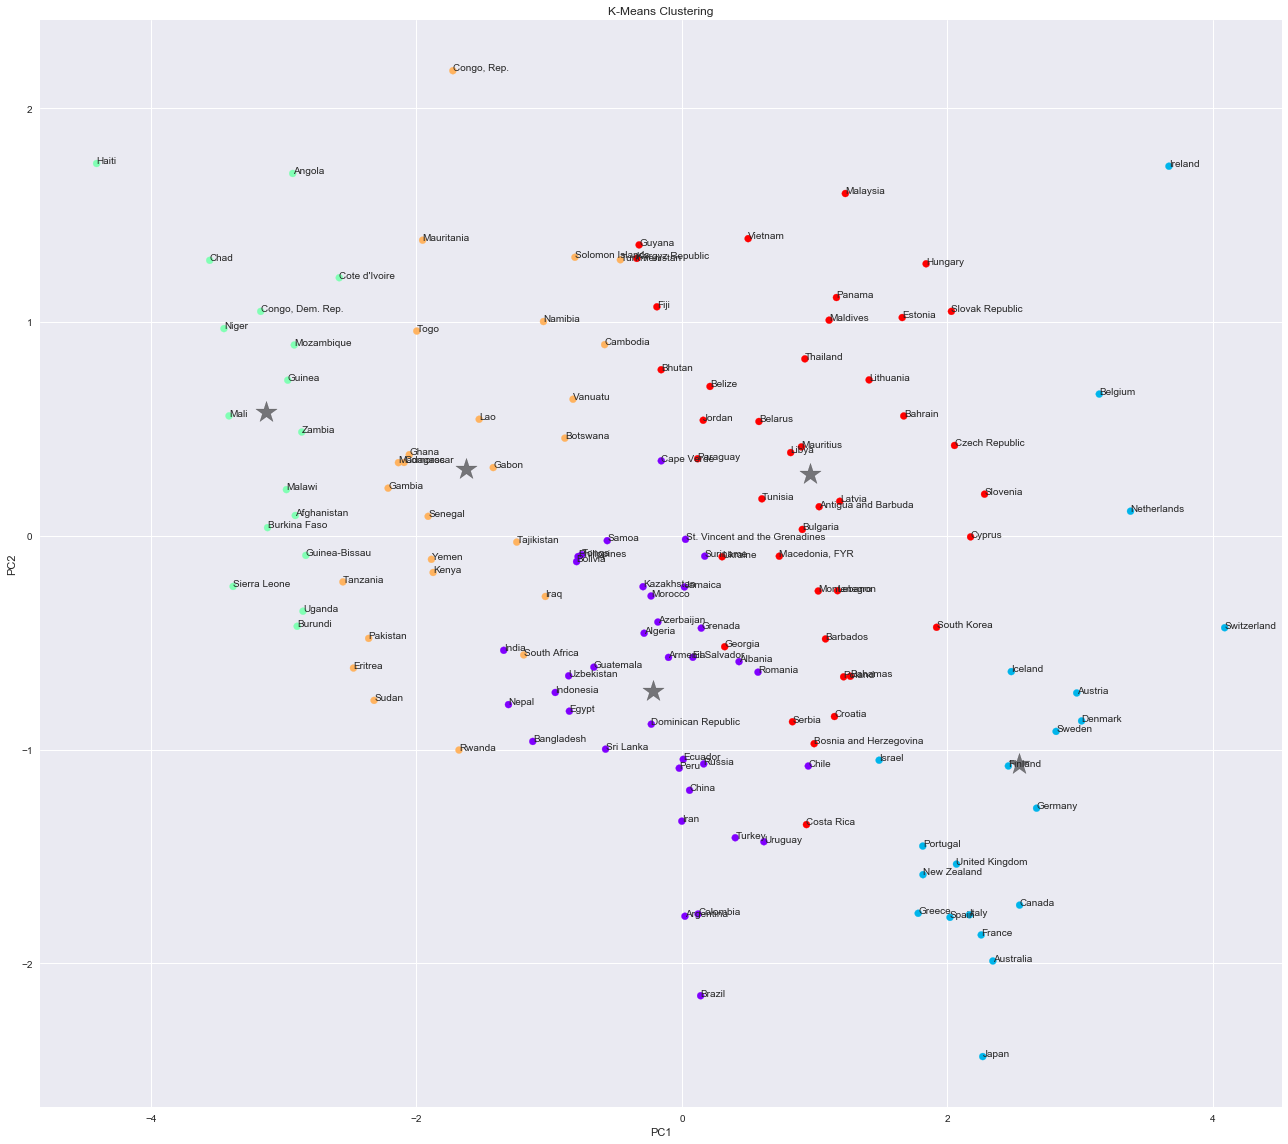

In [104]:
# Plotting Principal Components PC1 and PC2 with assigned clusters
fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(111)

plt.scatter(km_5_pca_country.PC1,km_5_pca_country.PC2, c=k_means_5.labels_, cmap='rainbow')
plt.scatter(k_means_5.cluster_centers_[:,0] ,k_means_5.cluster_centers_[:,1], marker='*', color='black',s=500, alpha=0.5)  
ax.set_title('K-Means Clustering')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# Code to display country names
for i, txt in enumerate(km_5_pca_country.country):
    plt.annotate(txt, (km_5_pca_country.PC1[i],km_5_pca_country.PC2[i]))
plt.tight_layout()

plt.show()

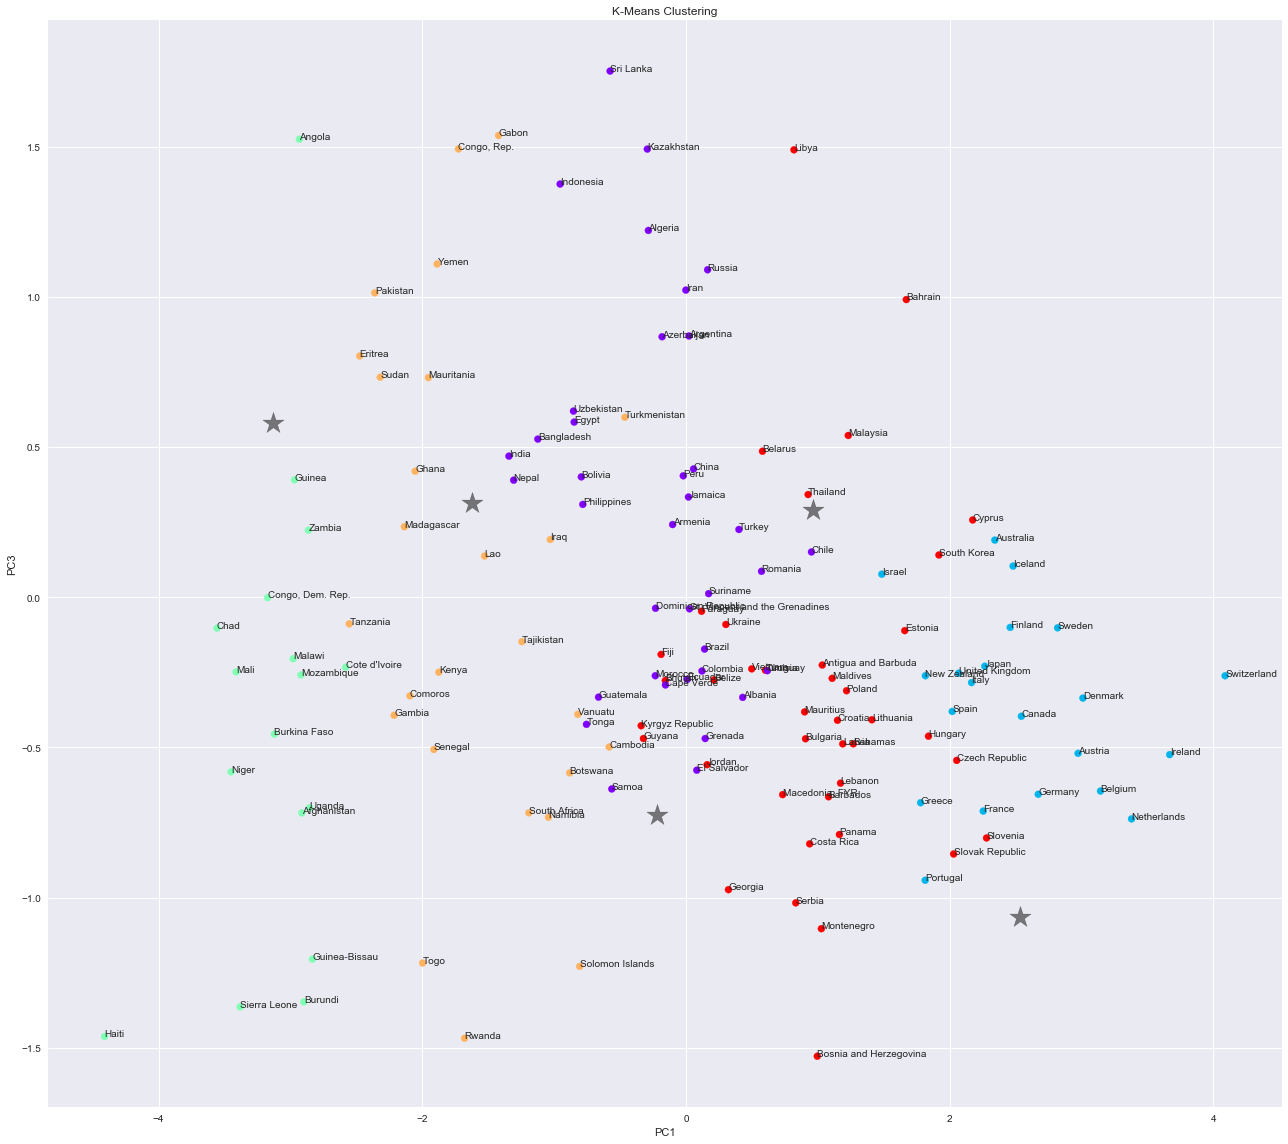

In [105]:
# Plotting Principal Components PC1 and PC3 with assigned clusters
fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(111)

plt.scatter(km_5_pca_country.PC1,km_5_pca_country.PC3, c=k_means_5.labels_, cmap='rainbow')
plt.scatter(k_means_5.cluster_centers_[:,0] ,k_means_5.cluster_centers_[:,1], marker='*', color='black',s=500, alpha=0.5)  
ax.set_title('K-Means Clustering')
ax.set_xlabel('PC1')
ax.set_ylabel('PC3')

# Code to display country names
for i, txt in enumerate(km_5_pca_country.country):
    plt.annotate(txt, (km_5_pca_country.PC1[i],km_5_pca_country.PC3[i]))
plt.tight_layout()
plt.show()


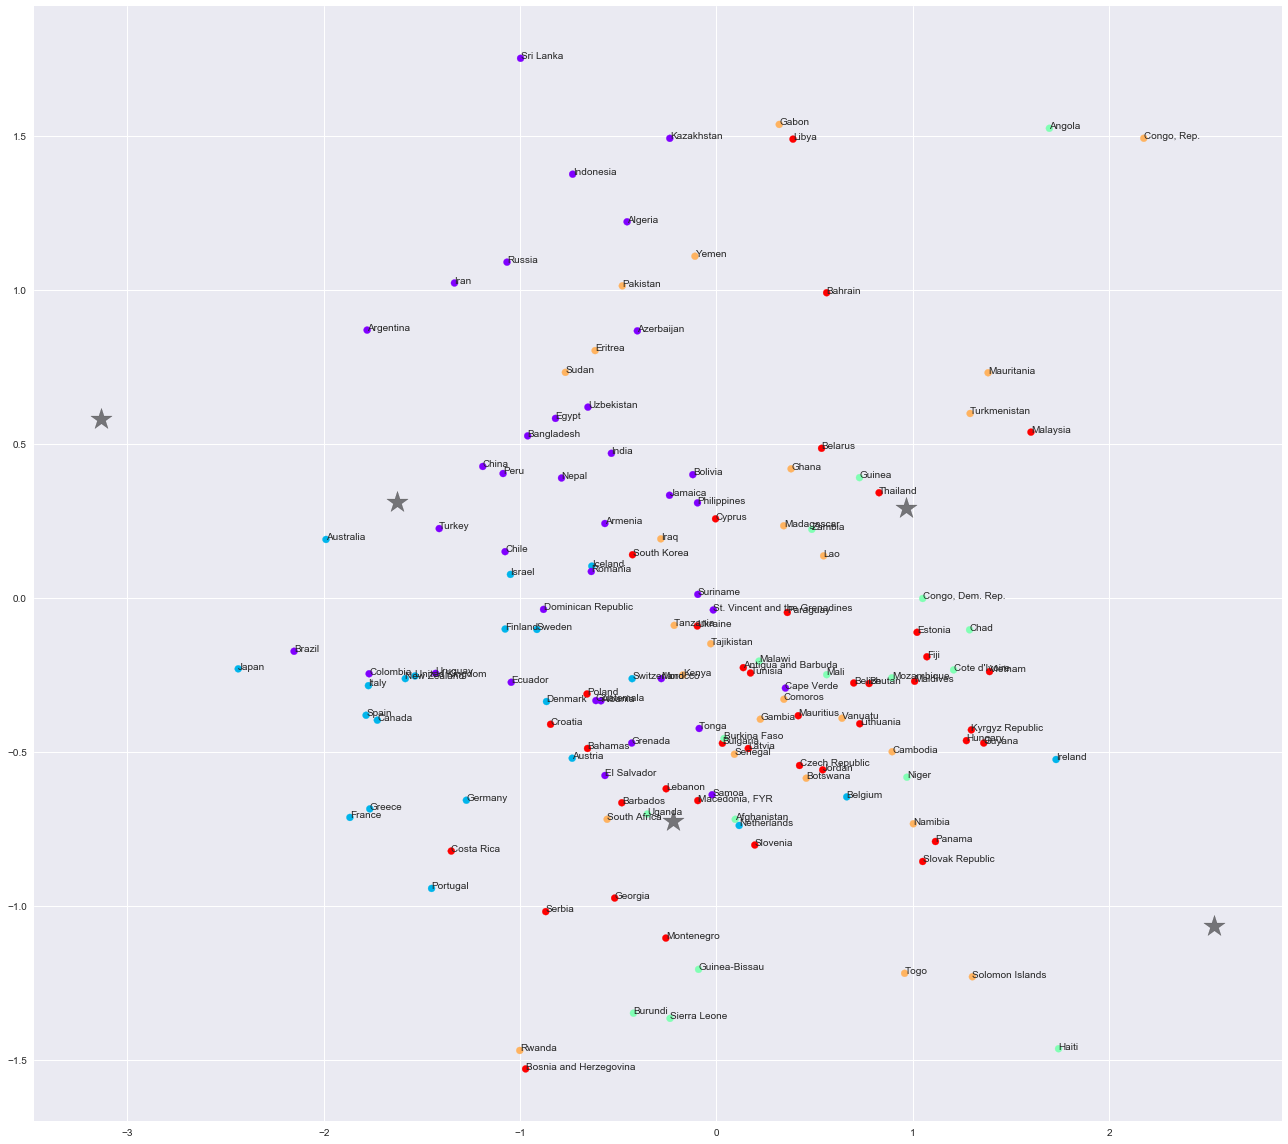

In [106]:
# Plotting Principal Components PC2 and PC3 with assigned clusters
fig = plt.figure(figsize=(18,16))

plt.scatter(km_5_pca_country.PC2,km_5_pca_country.PC3, c=k_means_5.labels_, cmap='rainbow')
plt.scatter(k_means_5.cluster_centers_[:,0] ,k_means_5.cluster_centers_[:,1], marker='*', color='black',s=500, alpha=0.5)  
ax.set_title('K-Means Clustering')
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')

# Code to display country names
for i, txt in enumerate(km_5_pca_country.country):
    plt.annotate(txt, (km_5_pca_country.PC2[i],km_5_pca_country.PC3[i]))
plt.tight_layout()
plt.show()

### Scatter Plots of Original Variables with assigned Clusters

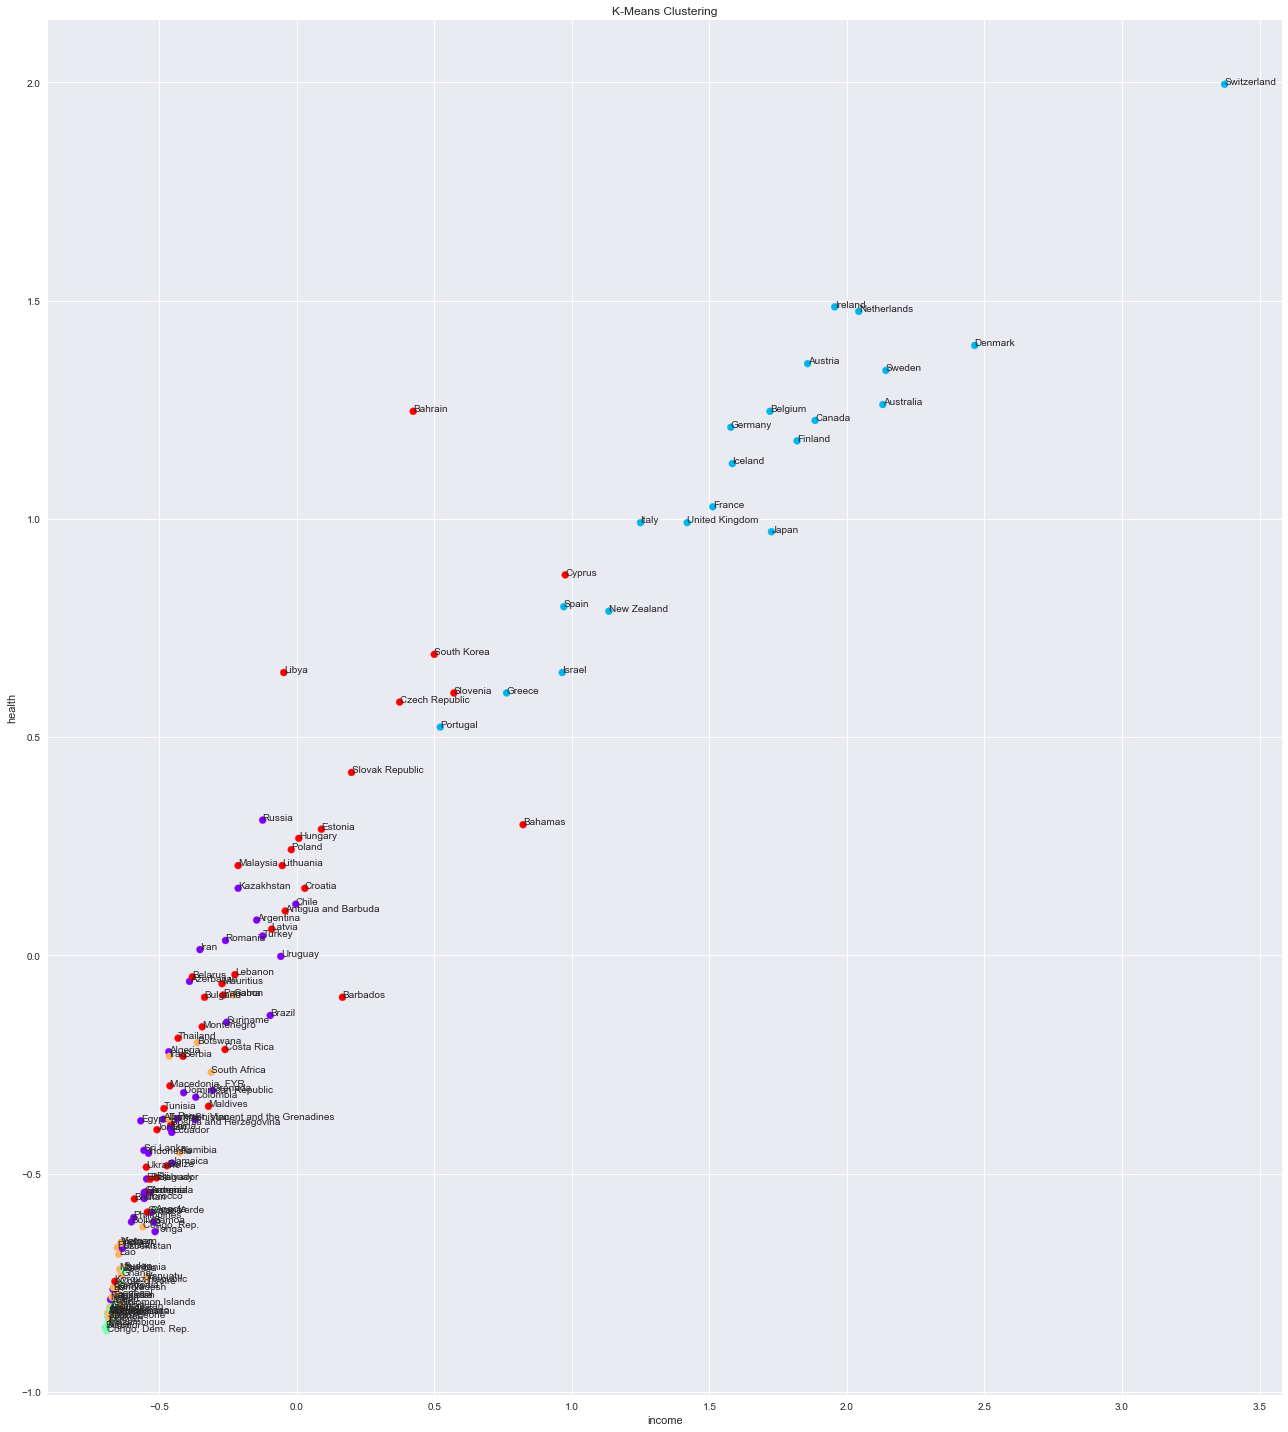

In [107]:
# Plot for income vs gdpp with assigned clusters
fig = plt.figure(figsize=(18,20))
ax = fig.add_subplot(111)

plt.scatter(km_5_pca_country.gdpp,km_5_pca_country.income, c=k_means_5.labels_, cmap='rainbow')
ax.set_title('K-Means Clustering')
ax.set_xlabel('income')
ax.set_ylabel('health')

# Code to display country names
for i, txt in enumerate(km_5_pca_country.country):
    plt.annotate(txt, (km_5_pca_country.gdpp[i],km_5_pca_country.income[i]))
plt.tight_layout()
plt.show()

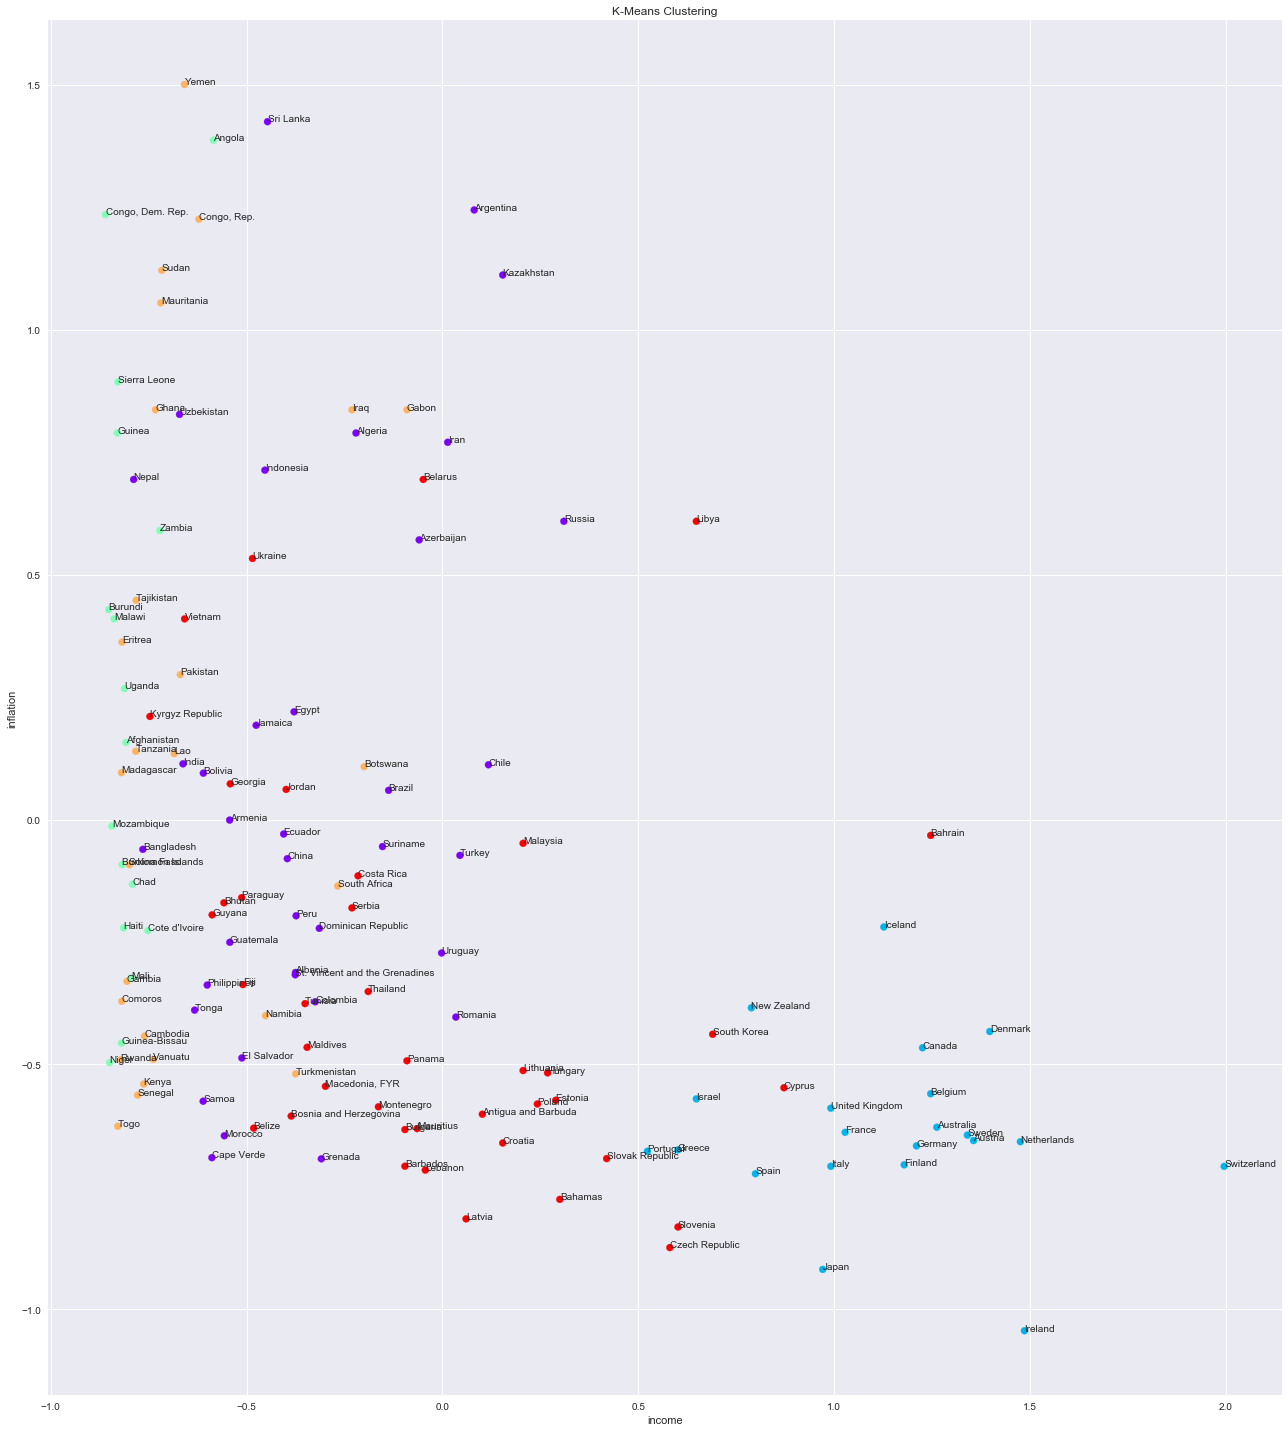

In [108]:
# Plot for income vs inflation with assigned clusters
fig = plt.figure(figsize=(18,20))
ax = fig.add_subplot(111)

plt.scatter(km_5_pca_country.income,km_5_pca_country.inflation, c=k_means_5.labels_, cmap='rainbow')
ax.set_title('K-Means Clustering')
ax.set_xlabel('income')
ax.set_ylabel('inflation')

# Code to display country names
for i, txt in enumerate(km_5_pca_country.country):
    plt.annotate(txt, (km_5_pca_country.income[i],km_5_pca_country.inflation[i]))
plt.tight_layout()
plt.show()

In [109]:
# Inspecting dataframe having Principal components, All original variables along with assigned cluster id's
km_5_pca_all.head()

,PC1,PC2,PC3,PC4,PC5,ClusterId,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,2,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,0,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,2,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Antigua and Barbuda


In [110]:
# No. of countries in each cluster
cluster_5_wise_count_all = pd.DataFrame(km_5_pca_all.groupby('ClusterId')['country'].count())
cluster_5_wise_count_all

,country
ClusterId,
0,37
1,21
2,17
3,26
4,40


### Mean Analysis for each cluster

In [111]:
# For all original variables
# Calculating mean for each assigned cluster and storing it to dataframe

# Mean for child_mort variable
child_mort_mean_5 = pd.DataFrame(km_5_pca_all.groupby('ClusterId').child_mort.mean())

# Mean for exports variable
exports_mean_5 = pd.DataFrame(km_5_pca_all.groupby('ClusterId').exports.mean())

# Mean for health variable 
health_mean_5 = pd.DataFrame(km_5_pca_all.groupby('ClusterId').health.mean())

# Mean for imports variable
imports_mean_5 = pd.DataFrame(km_5_pca_all.groupby('ClusterId').imports.mean())

# Mean for income variable
income_mean_5 = pd.DataFrame(km_5_pca_all.groupby('ClusterId').income.mean())

# Mean for inflation variable
inflation_mean_5 = pd.DataFrame(km_5_pca_all.groupby('ClusterId').inflation.mean())

# Mean for life_expec variable
life_expec_mean_5 = pd.DataFrame(km_5_pca_all.groupby('ClusterId').life_expec.mean())

# Mean for total_fer variable
total_fer_mean_5 = pd.DataFrame(km_5_pca_all.groupby('ClusterId').total_fer.mean())

# Mean for gdpp variable
gdpp_mean_5 = pd.DataFrame(km_5_pca_all.groupby('ClusterId').gdpp.mean())

In [112]:
# Joining all the dataframe contains mean of original variables per cluster
km_5_mean_df = pd.concat([pd.Series(cluster_5_wise_count_all.index), 
                     child_mort_mean_5, exports_mean_5, health_mean_5, imports_mean_5, income_mean_5,
                     inflation_mean_5, life_expec_mean_5, total_fer_mean_5, gdpp_mean_5], axis=1)

# Assigning column to dataframe
km_5_mean_df.columns = ['ClusterID', 'child_mort_mean', 'exports_mean', 'health_mean', 'imports_mean', 'income_mean',
                     'inflation_mean', 'life_expec_mean', 'total_fer_mean', 'gdpp_mean']
km_5_mean_df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,-0.331850,-0.494215,-0.438382,-0.541882,-0.338837,0.083328,0.256475,-0.348552,-0.417589
1,1,-0.847227,0.037307,1.239780,-0.294538,1.125701,-0.632053,1.176877,-0.761536,1.657733
2,2,1.977670,-0.514914,0.019832,-0.247932,-0.801160,0.246808,-1.737184,1.861960,-0.665711
3,3,0.635712,-0.225231,-0.447420,-0.154798,-0.643816,0.153650,-0.820061,0.832856,-0.586398
4,4,-0.624255,0.459426,0.071227,0.524911,-0.030551,-0.345218,0.483766,-0.689365,-0.162646


#### Visualising mean of all original variables per cluster

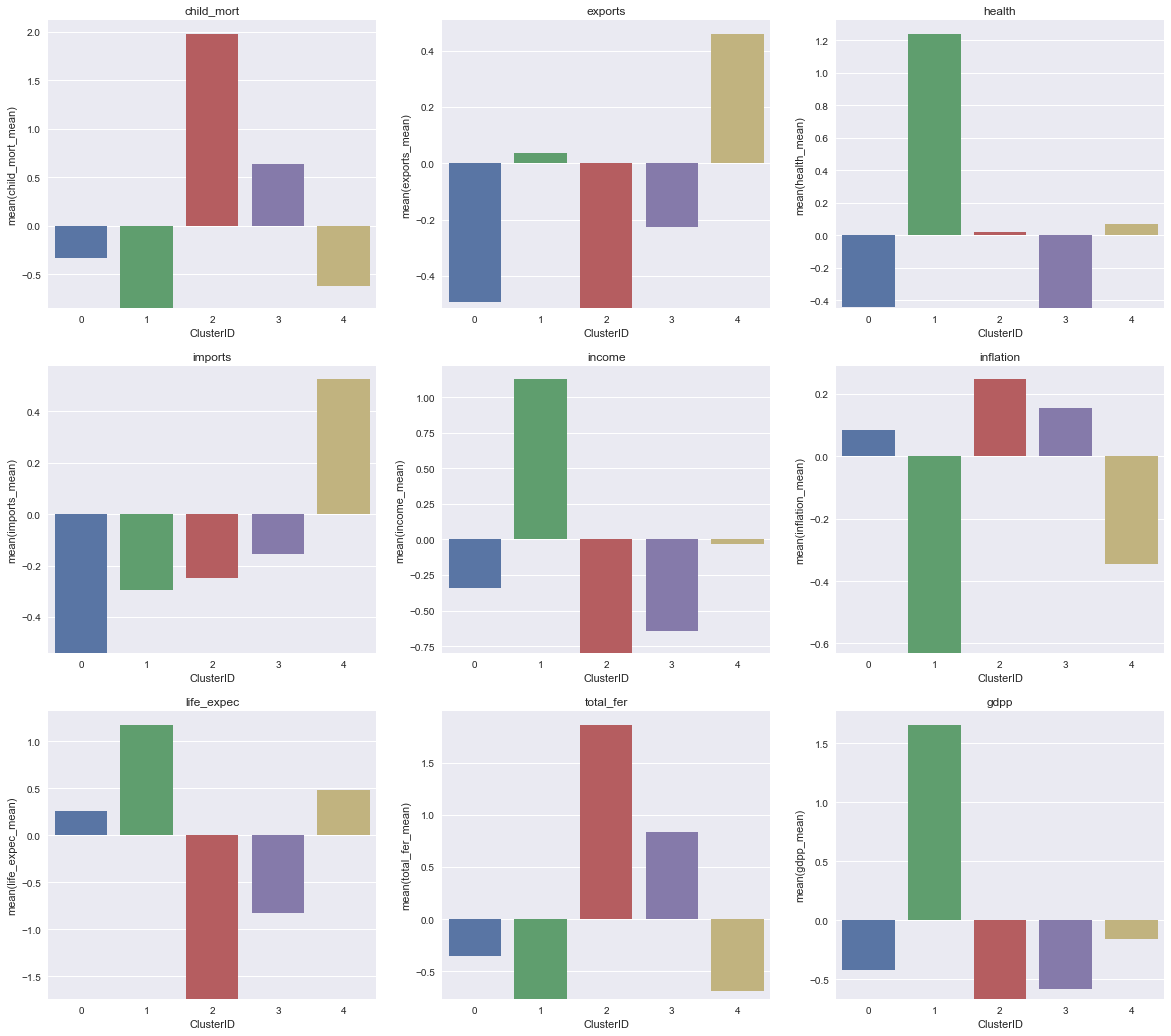

In [113]:
# Defining figure and axes for subplots
fig,ax = plt.subplots(3,3,figsize=(20,18))

# Plot for child_mort mean analysis for every cluster
sns.barplot(x = km_5_mean_df.ClusterID, y = km_5_mean_df.child_mort_mean, ax=ax[0,0])
ax[0,0].set_title('child_mort')


# Plot for exports mean analysis for every cluster
sns.barplot(x = km_5_mean_df.ClusterID, y = km_5_mean_df.exports_mean, ax=ax[0,1])
ax[0,1].set_title('exports')


# Plot for health mean analysis for every cluster
sns.barplot(x = km_5_mean_df.ClusterID, y = km_5_mean_df.health_mean, ax=ax[0,2])
ax[0,2].set_title('health')


# Plot for imports mean analysis for every cluster
sns.barplot(x = km_5_mean_df.ClusterID, y = km_5_mean_df.imports_mean, ax=ax[1,0])
ax[1,0].set_title('imports')


# Plot for income mean analysis for every cluster
sns.barplot(x = km_5_mean_df.ClusterID, y = km_5_mean_df.income_mean, ax=ax[1,1])
ax[1,1].set_title('income')


# Plot for inflation mean analysis for every cluster
sns.barplot(x = km_5_mean_df.ClusterID, y = km_5_mean_df.inflation_mean, ax=ax[1,2])
ax[1,2].set_title('inflation')


# Plot for life_expec mean analysis for every cluster
sns.barplot(x = km_5_mean_df.ClusterID, y = km_5_mean_df.life_expec_mean, ax=ax[2,0])
ax[2,0].set_title('life_expec')


# Plot for total_fer mean analysis for every cluster
sns.barplot(x = km_5_mean_df.ClusterID, y = km_5_mean_df.total_fer_mean, ax=ax[2,1])
ax[2,1].set_title('total_fer')


# Plot for gdpp mean analysis for every cluster
sns.barplot(x = km_5_mean_df.ClusterID, y = km_5_mean_df.gdpp_mean, ax=ax[2,2])
ax[2,2].set_title('gdpp')


plt.show()

### Clusters fits in criteria for funding

So we can infer from the above plots that the countries which are there in <span style="color:blue">__Cluster 3__</span> required more focus and need more money as funding.

#### Countries identified that are in the direst need of aid

In [114]:
# Making dataframe containing only original columns and assigned clusters
kmeans_cluster_5 = km_5_pca_all[['ClusterId','country','child_mort','exports','health','imports','income',
                        'inflation','life_expec','total_fer','gdpp']]

# Selecting countries assigned ClusterId = 3
kmeans_cluster_5 = kmeans_cluster_5.loc[km_5_pca_all['ClusterId'] == 3]
print('No. of countries required aide:', len(kmeans_cluster_5))
kmeans_cluster_5

No. of countries required aide: 26


,ClusterId,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
21,3,Botswana,0.353908,0.091147,0.541996,0.182698,-0.200033,0.107996,-1.517586,-0.045030,-0.361949
27,3,Cambodia,0.152456,0.475343,-0.414697,0.522426,-0.760900,-0.442341,-0.502530,-0.045030,-0.666429
36,3,Comoros,1.241791,-0.900444,-0.841922,0.199270,-0.818651,-0.371177,-0.525087,1.193948,-0.667359
38,3,"Congo, Rep.",0.637434,1.609635,-1.590479,0.323561,-0.621984,1.225748,-1.145399,1.326459,-0.559500
50,3,Eritrea,0.421059,-1.328914,-1.517449,-0.977347,-0.818131,0.362289,-0.998780,1.101191,-0.683065
55,3,Gabon,0.632460,0.607067,-1.210723,-1.159640,-0.090773,0.836717,-0.863439,0.750036,-0.230613
56,3,Gambia,1.045313,-0.633337,-0.411045,-0.173601,-0.805644,-0.330376,-0.570201,1.830001,-0.678687
59,3,Ghana,0.906037,-0.424773,-0.582666,-0.041025,-0.732804,0.836717,-0.942388,0.875922,-0.637754
72,3,Iraq,-0.034074,-0.062532,0.582163,-0.529901,-0.231250,0.836717,-0.378468,1.068063,-0.463187
80,3,Kenya,0.595154,-0.746766,-0.754286,-0.550616,-0.762981,-0.540073,-0.874718,0.942177,-0.656524


### Analysing individual countries selected for funding from cluster = 3

In [115]:
# Selected country - 'Afghanistan', 'Botswana','Chad'
sel_country_5 = kmeans_cluster_5.loc[kmeans_cluster_5['country'].isin(['Cambodia','Botswana','Kenya'])]
sel_country_5

,ClusterId,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
21,3,Botswana,0.353908,0.091147,0.541996,0.182698,-0.200033,0.107996,-1.517586,-0.045030,-0.361949
27,3,Cambodia,0.152456,0.475343,-0.414697,0.522426,-0.760900,-0.442341,-0.502530,-0.045030,-0.666429
80,3,Kenya,0.595154,-0.746766,-0.754286,-0.550616,-0.762981,-0.540073,-0.874718,0.942177,-0.656524


# Hierarchical Clustering

In [117]:
# Inspecting dataframe created after PCA, outlier removal specially for hierarchical clustering mentioned earlier
hierar_postpca_outrem_country.head()
hierar_postpca_outrem_country.head(5)

,PC1,PC2,PC3,PC4,PC5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007


#### Single linkage heirarchical clustering

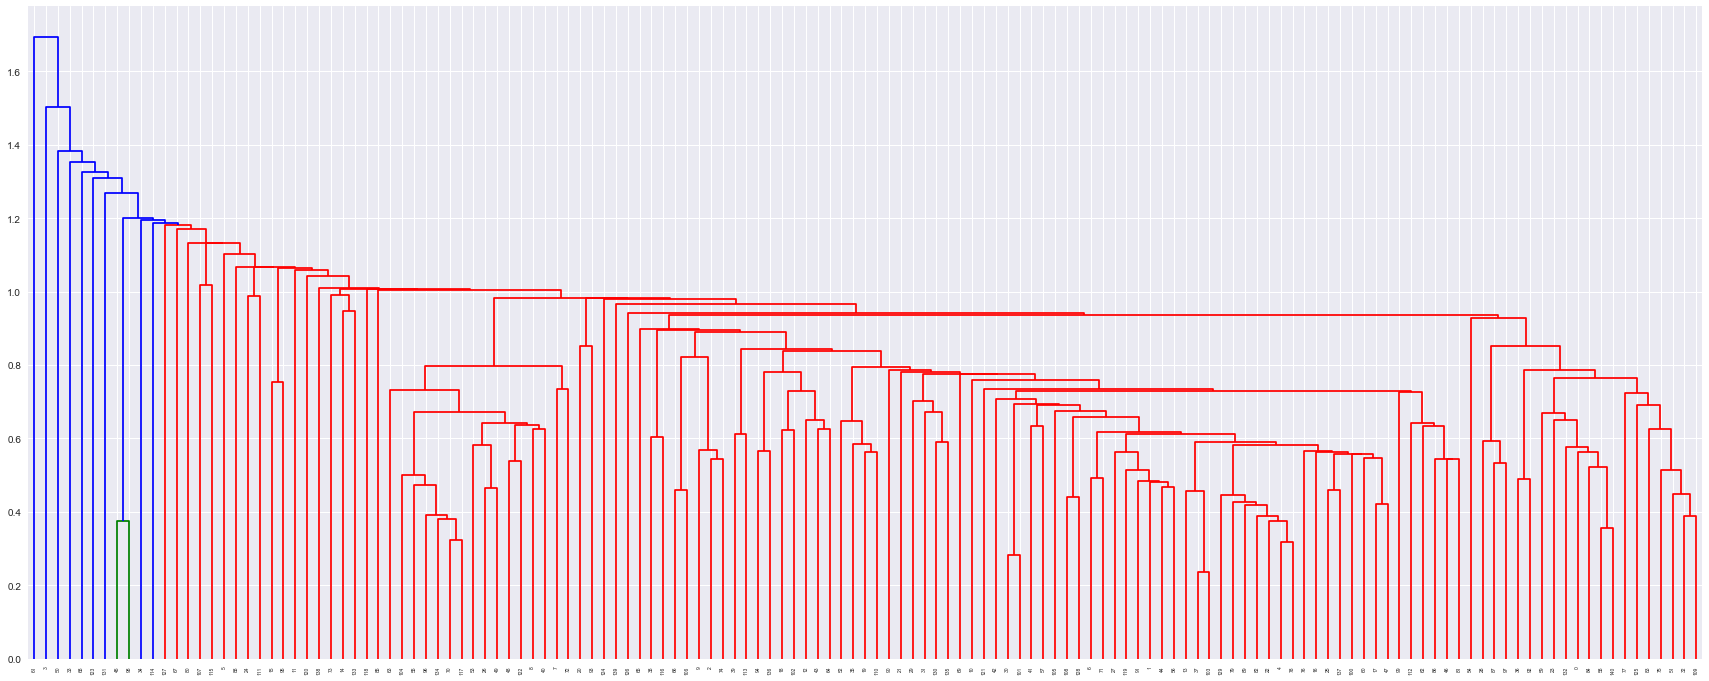

In [118]:
# heirarchical clustering for single linkage
plt.figure(figsize=(30,12))
single_mergings = linkage(hierar_postpca_outrem_country, method = "single", metric='euclidean')
dendrogram(single_mergings)#,leaf_rotation=45,leaf_font_size=12,show_contracted=True)
plt.show()

- In above dendrogram we check for the largest line and cut the dendrogram along it to find clusters.
- From above dendrogram we can say __optimal no. of cluster(k) = 3__

In [119]:
# Storing identified clusters into dataframe
single_clusterCut = pd.DataFrame(cut_tree(single_mergings, n_clusters = 3), columns=['ClusterId'])

# Retaining index
single_clusterCut.index = hierar_postpca_outrem_country.index

# Concatenating assigned Clusters with original dataframe
single_hc_pca = pd.concat([hierar_postpca_outrem_country,single_clusterCut], axis=1)
single_hc_pca.head()

,PC1,PC2,PC3,PC4,PC5,ClusterId
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,0
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,1
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,0


#### Complete Linkage heirarchical clustering

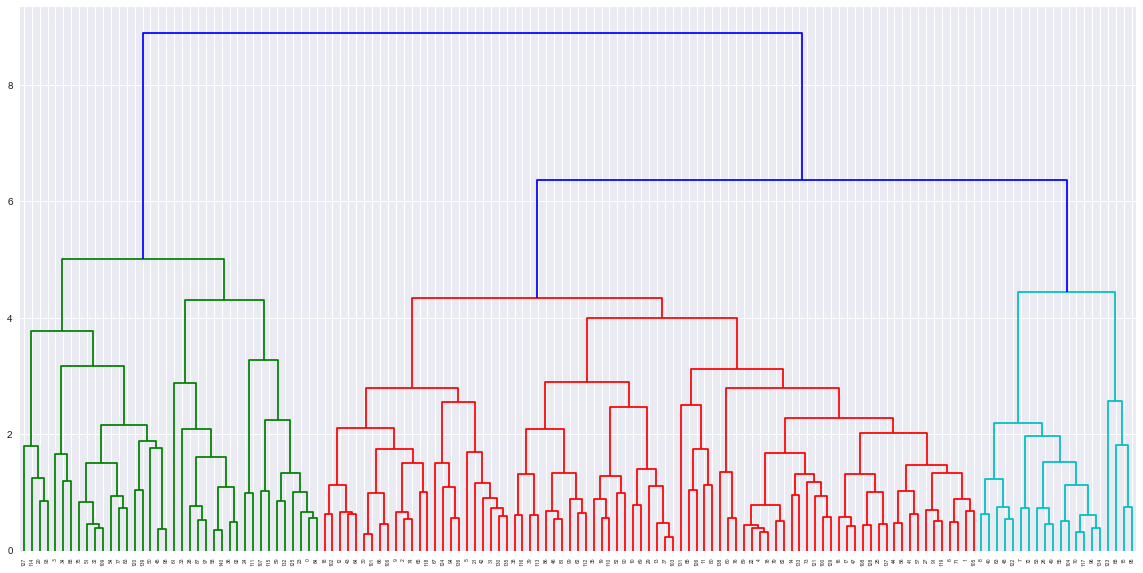

In [120]:
# Complete Linkage clustering
plt.figure(figsize=(20,10))
complete_mergings = linkage(hierar_postpca_outrem_country, method = "complete", metric='euclidean')
dendrogram(complete_mergings)
plt.show()

- In above dendrogram we check for the largest line and cut the dendrogram along it to find clusters.
- From above dendrogram we can say __optimal no. of cluster(k) = 3__

#### Obeservation from Hierarchical Clustering
- Observing plot for single linkage hierarchical clustering that clusters assigned are not very clear.
- Observing plot for complete linkage hierarchical clustering that clusters assigned are very clear.

So __selecting results from complete linkage hierarchical clustering for mean analysis__ etc.

In [121]:
# Storing identified clusters into dataframe
complete_clusterCut = pd.DataFrame(cut_tree(complete_mergings, n_clusters = 3), columns=['ClusterId'])

# Retaining index
complete_clusterCut.index = hierar_postpca_outrem_country.index

# Concatenating assigned Clusters with original dataframe
complete_hc_pca = pd.concat([hierar_postpca_outrem_country,complete_clusterCut], axis=1)
complete_hc_pca.head()

,PC1,PC2,PC3,PC4,PC5,ClusterId
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,1
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,1
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,0
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,1


#### Adding all orginal variables to clustered dataframe

In [122]:
complete_hc_pca_all = complete_hc_pca.join(country_scaled_df)
complete_hc_pca_all.head()

,PC1,PC2,PC3,PC4,PC5,ClusterId,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,1,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,0,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,1,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Antigua and Barbuda


In [123]:
# Number of countries falling in each clusters
hc_cluster_wise_count_all = pd.DataFrame(complete_hc_pca_all.groupby('ClusterId')['country'].count())
hc_cluster_wise_count_all

,country
ClusterId,
0,38
1,83
2,20


### Mean Analysis for each cluster

In [124]:
# For all original variables
# Calculating mean for each assigned cluster and storing it to dataframe

# Mean for child_mort variable
child_mort_mean= pd.DataFrame(complete_hc_pca_all.groupby('ClusterId').child_mort.mean())

# Mean for exports variable
exports_mean= pd.DataFrame(complete_hc_pca_all.groupby('ClusterId').exports.mean())

# Mean for health variable 
health_mean = pd.DataFrame(complete_hc_pca_all.groupby('ClusterId').health.mean())

# Mean for imports variable
imports_mean= pd.DataFrame(complete_hc_pca_all.groupby('ClusterId').imports.mean())

# Mean for income variable
income_mean= pd.DataFrame(complete_hc_pca_all.groupby('ClusterId').income.mean())

# Mean for inflation variable
inflation_mean= pd.DataFrame(complete_hc_pca_all.groupby('ClusterId').inflation.mean())

# Mean for life_expec variable
life_expec_mean= pd.DataFrame(complete_hc_pca_all.groupby('ClusterId').life_expec.mean())

# Mean for total_fer variable
total_fer_mean= pd.DataFrame(complete_hc_pca_all.groupby('ClusterId').total_fer.mean())

# Mean for gdpp variable
gdpp_mean= pd.DataFrame(complete_hc_pca_all.groupby('ClusterId').gdpp.mean())

In [125]:
# Joining all the dataframe contains mean of original variables per cluster
hierar_mean_df = pd.concat([pd.Series(hc_cluster_wise_count_all.index), 
                     child_mort_mean, exports_mean, health_mean, imports_mean, income_mean,
                     inflation_mean, life_expec_mean, total_fer_mean, gdpp_mean], axis=1)

# Assigning column to dataframe
hierar_mean_df.columns = ['ClusterID', 'child_mort_mean', 'exports_mean', 'health_mean', 'imports_mean', 'income_mean',
                     'inflation_mean', 'life_expec_mean', 'total_fer_mean', 'gdpp_mean']

hierar_mean_df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,1.297750,-0.409261,-0.237118,-0.233130,-0.722926,0.219936,-1.281927,1.358541,-0.625037
1,1,-0.448815,0.009758,-0.185048,0.011886,-0.192755,-0.138108,0.336420,-0.466670,-0.286790
2,2,-0.847718,0.050349,1.286902,-0.280284,1.149584,-0.635134,1.174568,-0.802331,1.692365


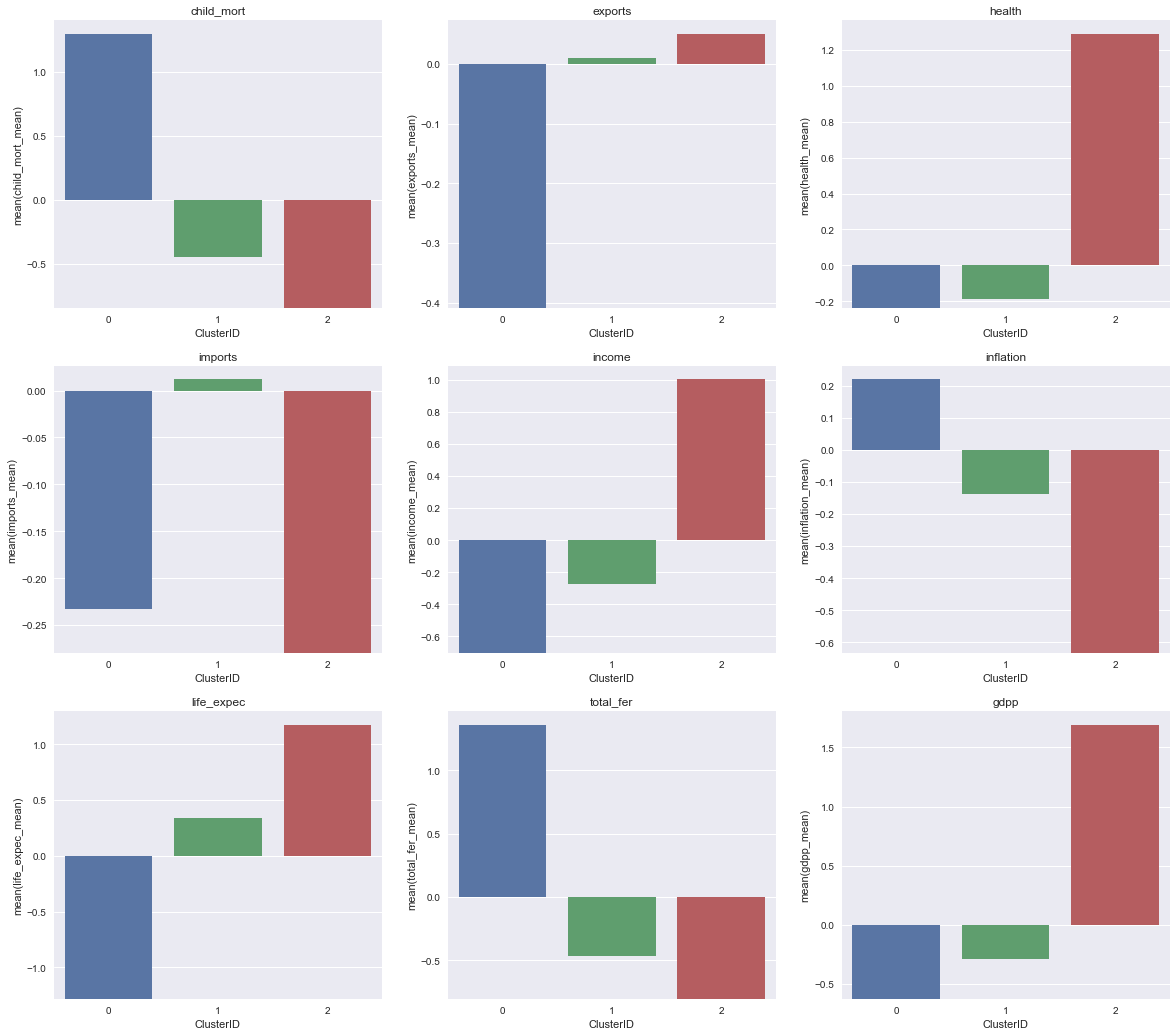

In [126]:
# Defining figure and axes for subplots
fig,ax = plt.subplots(3,3,figsize=(20,18))

# Plot for child_mort mean analysis for every cluster
sns.barplot(x = hierar_mean_df.ClusterID, y = hierar_mean_df.child_mort_mean, ax=ax[0,0])
ax[0,0].set_title('child_mort')


# Plot for exports mean analysis for every cluster
sns.barplot(x = hierar_mean_df.ClusterID, y = hierar_mean_df.exports_mean, ax=ax[0,1])
ax[0,1].set_title('exports')


# Plot for health mean analysis for every cluster
sns.barplot(x = hierar_mean_df.ClusterID, y = hierar_mean_df.health_mean, ax=ax[0,2])
ax[0,2].set_title('health')


# Plot for imports mean analysis for every cluster
sns.barplot(x = hierar_mean_df.ClusterID, y = hierar_mean_df.imports_mean, ax=ax[1,0])
ax[1,0].set_title('imports')


# Plot for income mean analysis for every cluster
sns.barplot(x = km_mean_df.ClusterID, y = km_mean_df.income_mean, ax=ax[1,1])
ax[1,1].set_title('income')


# Plot for inflation mean analysis for every cluster
sns.barplot(x = hierar_mean_df.ClusterID, y = hierar_mean_df.inflation_mean, ax=ax[1,2])
ax[1,2].set_title('inflation')


# Plot for life_expec mean analysis for every cluster
sns.barplot(x = hierar_mean_df.ClusterID, y = hierar_mean_df.life_expec_mean, ax=ax[2,0])
ax[2,0].set_title('life_expec')


# Plot for total_fer mean analysis for every cluster
sns.barplot(x = hierar_mean_df.ClusterID, y = hierar_mean_df.total_fer_mean, ax=ax[2,1])
ax[2,1].set_title('total_fer')


# Plot for gdpp mean analysis for every cluster
sns.barplot(x = hierar_mean_df.ClusterID, y = hierar_mean_df.gdpp_mean, ax=ax[2,2])
ax[2,2].set_title('gdpp')


plt.show()

### Clusters fits in criteria for funding

So we can infer from the above plots that the countries which are there in <span style="color:blue">__Cluster 0__</span> required more focus and need more money as funding.

#### Countries identified that are in the direst need of aid

In [127]:
# Making dataframe containing only original columns and assigned clusters
hierarichal_cluster_0 = complete_hc_pca_all[['ClusterId','country','child_mort','exports','health','imports',
                                             'income','inflation','life_expec','total_fer','gdpp']]

# Selecting countries assigned ClusterId = 0
hierarichal_cluster_0 = hierarichal_cluster_0.loc[complete_hc_pca_all['ClusterId'] == 0]

hierarichal_cluster_0.head()

,ClusterId,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
3,0,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
21,0,Botswana,0.353908,0.091147,0.541996,0.182698,-0.200033,0.107996,-1.517586,-0.045030,-0.361949
25,0,Burkina Faso,1.933196,-0.801651,-0.027638,-0.716337,-0.817611,-0.092213,-1.427359,1.936010,-0.677976
26,0,Burundi,1.376093,-1.177797,1.746991,-0.318607,-0.852261,0.428709,-1.449916,2.194407,-0.696801


# Analysis for Outliers
We will visualise outlier using scatter plot

In [128]:
# Inspecting dataframe that contain outliers - created after PCA
print(outlier_df.shape)
outlier_df.head()

(26, 6)


,PC1,PC2,PC3,PC4,PC5,country
17,-2.672314,0.418172,-0.257368,0.278672,-1.431768,Benin
23,2.460086,0.016454,3.019840,0.776841,-1.031809,Brunei
28,-2.807909,0.078649,-0.342961,0.543557,-1.314868,Cameroon
31,-3.964964,0.386619,-0.323557,0.918301,-1.822389,Central African Republic
49,-1.293423,2.363695,1.779334,1.737244,0.060761,Equatorial Guinea


In [129]:
# Resetting index for Scater Plot
outlier_reindex = outlier_df.reset_index(drop=True)

##### Scatter plot for PC1 and PC2

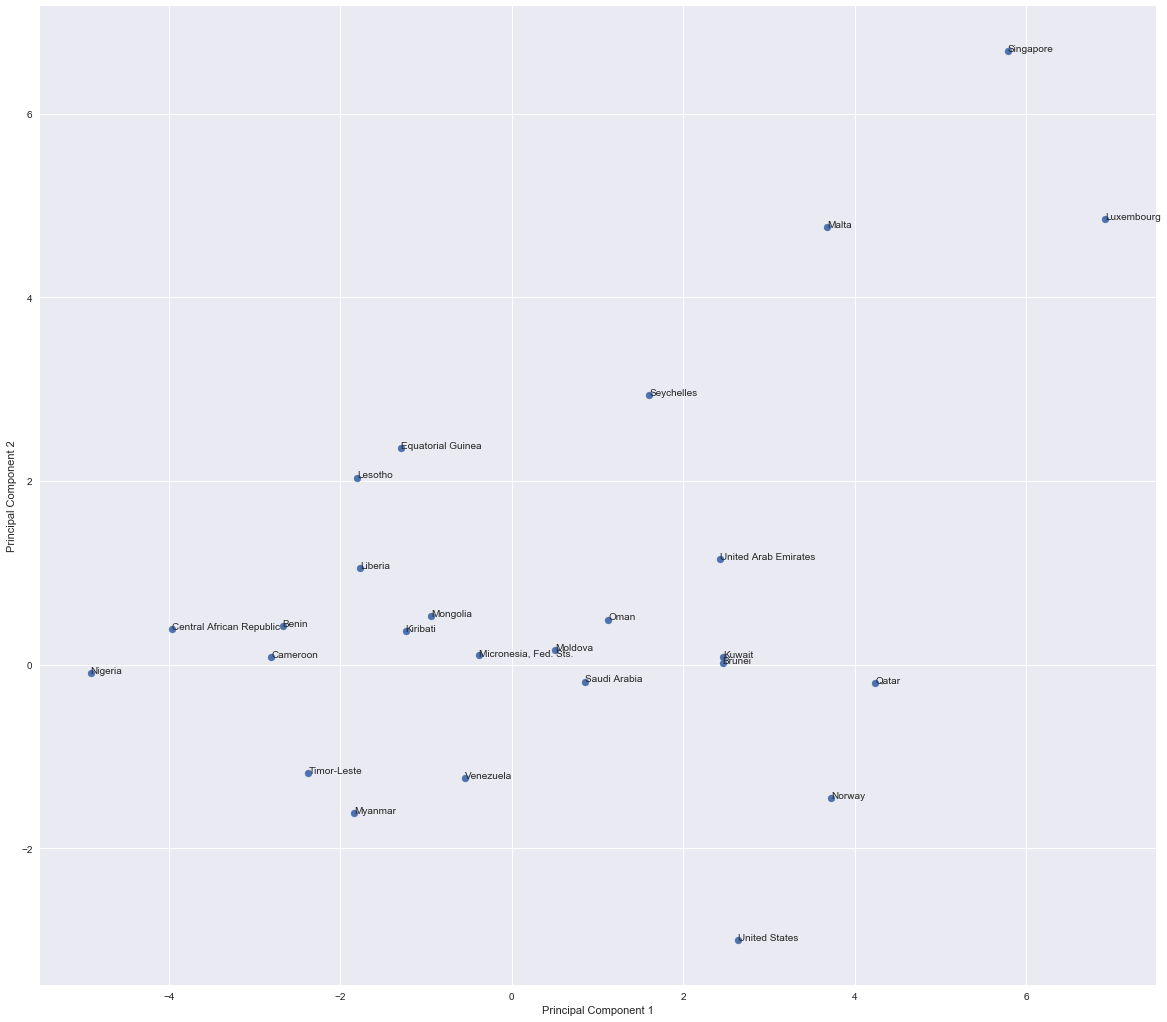

In [130]:
%matplotlib inline
fig = plt.figure(figsize = (20,18))
plt.scatter(outlier_reindex.PC1, outlier_reindex.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(outlier_reindex.country):
    plt.annotate(txt, (outlier_reindex.PC1[i],outlier_reindex.PC2[i]))
plt.show()

#### Manual Analysis of Outliers
- By obeserving the values of original values for the countries which are ouliers, we found that they are mostly developed countries.
- We only had to find the countries which are dire in need of money.

__Conclusion__
We are keeping outliers as it is.